## Bartosz Szar - Sprawozdanie z laboratorium 5



### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

In [0]:
from tabulate import tabulate
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math


def to_table(min, max, points_number, function):
    table = []
    x_values = []
    y_values = []
    step = (max - min) / points_number
    for i in np.arange(min, max + step, step):
        table.append([i, function(i)])
        x_values.append(i)
        y_values.append(function(i))
    return x_values, y_values


def square_approx_polynomial(x_values, y_values, degree):
    n = len(x_values)

    values = [0] * (2 * degree + 1)
    for i in range(2 * degree + 1):
        for j in range(n):
            values[i] += pow(x_values[j], i)

    B_arr = np.zeros(degree + 1)
    for i in range(degree + 1):
        for j in range(n):
            B_arr[i] += (pow(x_values[j], i) * y_values[j])

    C_mat = np.zeros((degree + 1, degree + 1))
    for i in range(degree + 1):
        for j in range(degree + 1):
            C_mat[i][j] = values[i + j]

    A = np.linalg.solve(C_mat, B_arr)

    polynomial = 0
    X = sp.symbols('x')
    for i in range(degree + 1):
        polynomial += pow(X, i) * A[i]

    return sp.simplify(polynomial)


def eval(f, x):
    X = sp.symbols('x')
    return f.evalf(subs={X: x})


def to_chart(min, max, points_number, function1, function2, function_name):
    x_axis = []
    function1_values = []
    function2_values = []
    step = (max - min) / points_number
    for i in np.arange(min, max + step, step):
        x_axis.append(i)
        function1_values.append(function1(i))
        function2_values.append(function2(i))
    params = {'figure.figsize': (10, 8)}
    plt.rcParams.update(params)
    plt.plot(x_axis, function1_values, label=function_name)
    plt.plot(x_axis, function2_values, label="approximation of " + function_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(function_name)
    plt.legend()
    plt.show()


def compare_results(min, max, points_number, function1, function2, function_name, error_arr, show_table):
    table = []
    step = (max - min) / points_number
    for i in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([i, function1(i), function2(i), abs(function2(i) - function1(i)) / abs(function1(i))])
        error_arr.append(abs(function2(i) - function1(i)) / abs(function1(i)))
    if show_table:
        print(tabulate(table,
                       headers=['x', function_name, 'interpolated ' + function_name, 'relative error'],
                       tablefmt="fancy_grid", floatfmt=".10f"))


def square_approx_n_degree(min, max, n, degree, show_table):
    x_sqrt, y_sqrt = to_table(min, max, n, math.sqrt)
    x_sin, y_sin = to_table(min, max, n, math.sin)
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f = to_table(min, max, n, f)

    for i in range(1, degree + 1):
        sqrt_polynomial = square_approx_polynomial(x_sqrt, y_sqrt, i)
        sin_polynomial = square_approx_polynomial(x_sin, y_sin, i)
        f_polynomial = square_approx_polynomial(x_f, y_f, i)

        sqrt_eval = lambda x: eval(sqrt_polynomial, x)
        sin_eval = lambda x: eval(sin_polynomial, x)
        f_eval = lambda x: eval(f_polynomial, x)

        error_arr = []
        to_chart(min, max, 100, math.sqrt, sqrt_eval, "sqrt(x)")
        compare_results(min, max, n, math.sqrt, sqrt_eval, "sqrt(x)", error_arr, show_table)
        print("relative error for sqrt - approx of {} degree: {} %".format(i, (np.sum(error_arr) / len(error_arr))))

        error_arr = []
        to_chart(min, max, 100, math.sin, sin_eval, "sin(x)")
        compare_results(min, max, n, math.sin, sin_eval, "sqrt(x)", error_arr, show_table)
        print("relative error for sin - approx of {} degree: {} %".format(i, (np.sum(error_arr) / len(error_arr))))

        error_arr = []
        to_chart(min, max, 100, f, f_eval, "x^3 + 2*x")
        compare_results(min, max, n, f, f_eval, "sqrt(x)", error_arr, show_table)
        print("relative error for x^3 + 2*x - approx of {} degree: {} %".format(i, (np.sum(error_arr) / len(error_arr))))

**3 Węzły**

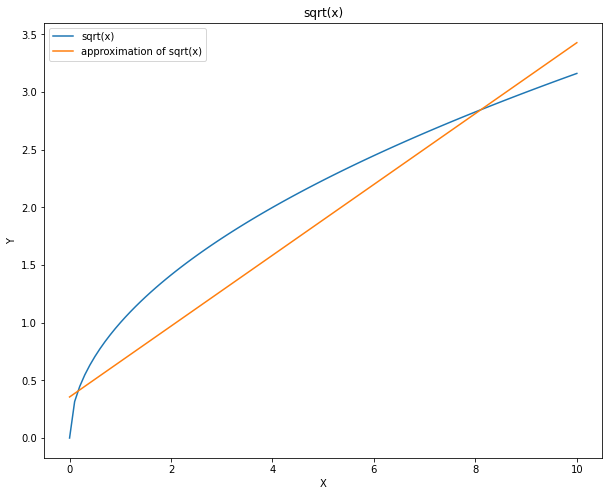

relative error for sqrt - approx of 1 degree: 0.163853243266421 %


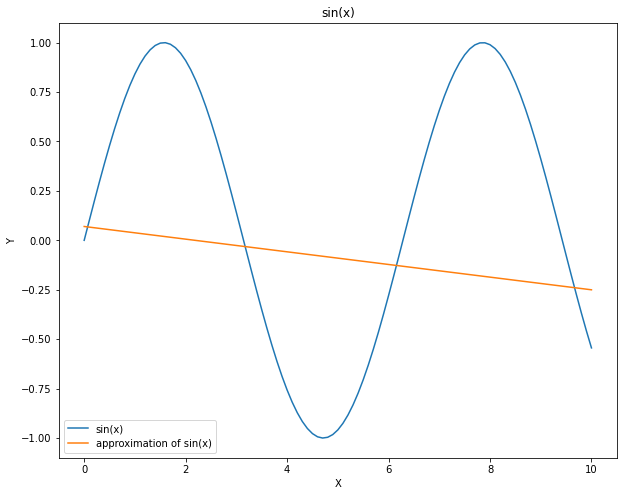

relative error for sin - approx of 1 degree: 1.03705880507559 %


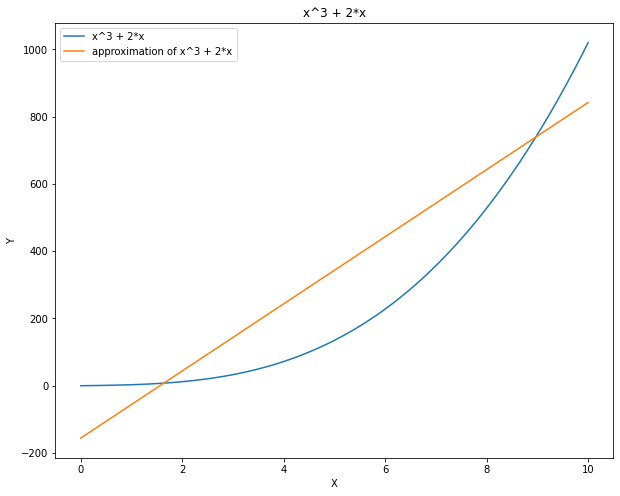

relative error for x^3 + 2*x - approx of 1 degree: 0.675783450595481 %


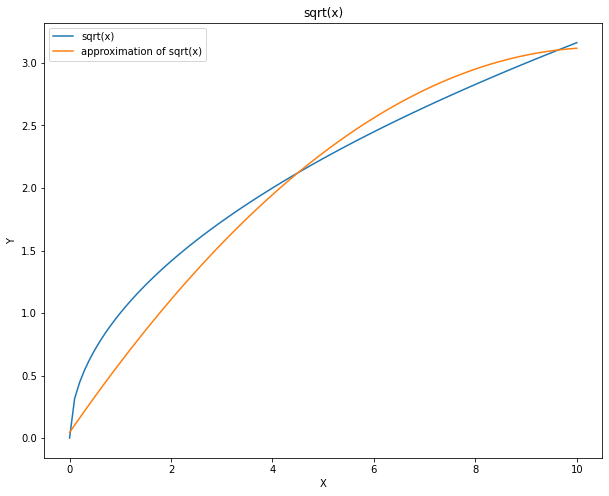

relative error for sqrt - approx of 2 degree: 0.108330681319407 %


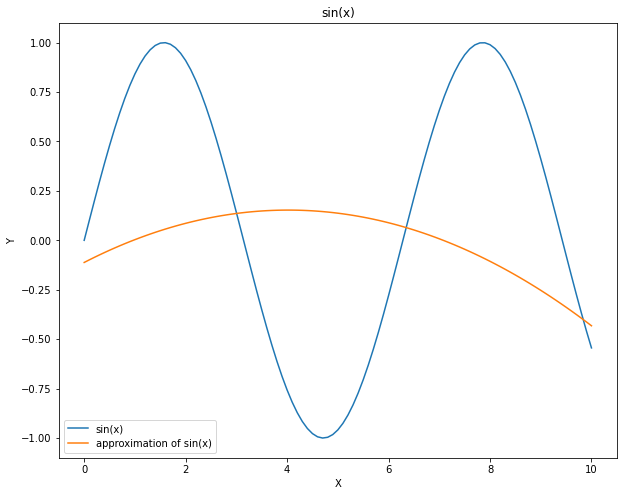

relative error for sin - approx of 2 degree: 1.08378526745802 %


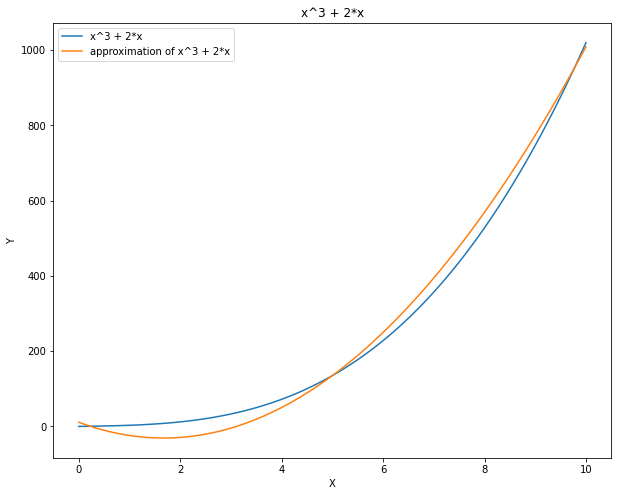

relative error for x^3 + 2*x - approx of 2 degree: 1.64967991609100 %


In [10]:
square_approx_n_degree(0, 10, 3, 2, False)


**4 węzły**

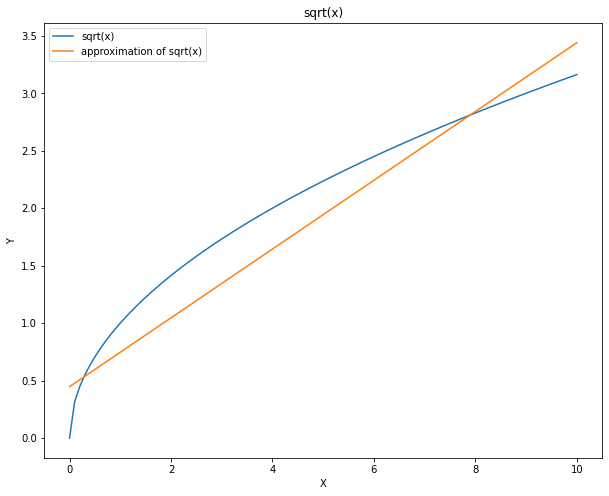

relative error for sqrt - approx of 1 degree: 0.141070235304485 %


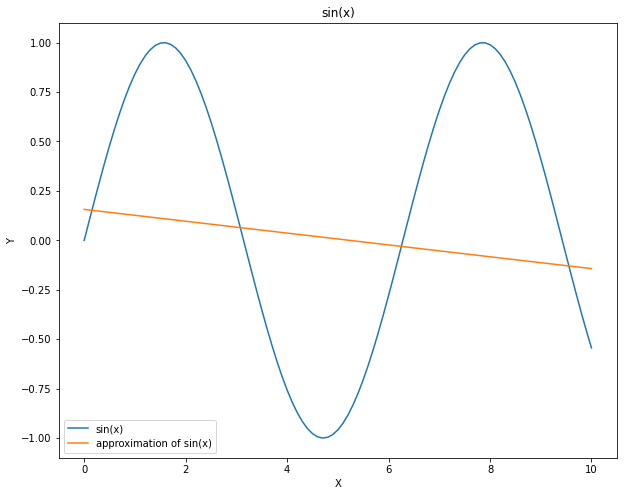

relative error for sin - approx of 1 degree: 0.798732544755241 %


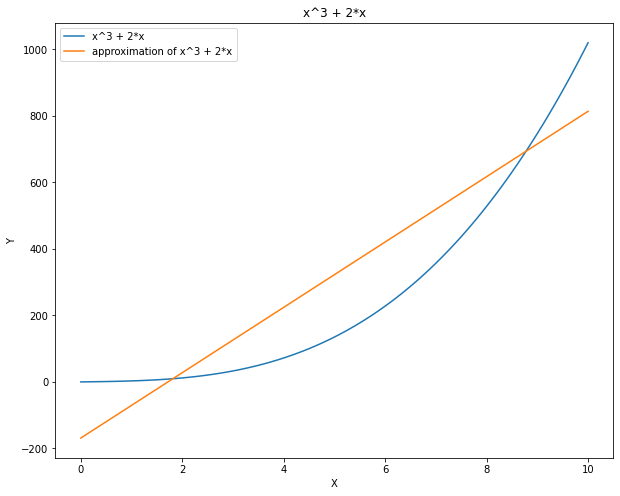

relative error for x^3 + 2*x - approx of 1 degree: 3.59280965145920 %


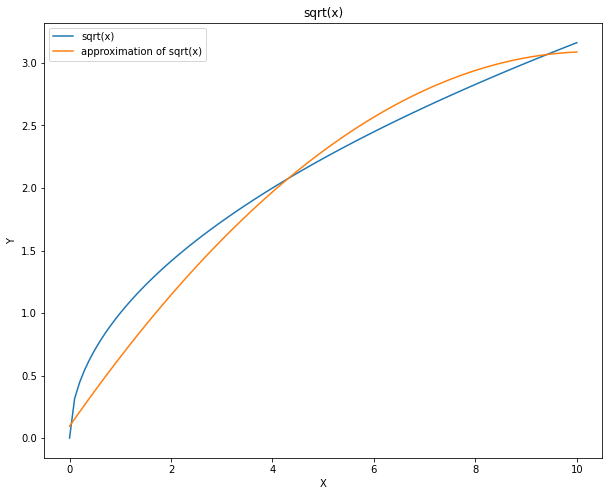

relative error for sqrt - approx of 2 degree: 0.101767965379352 %


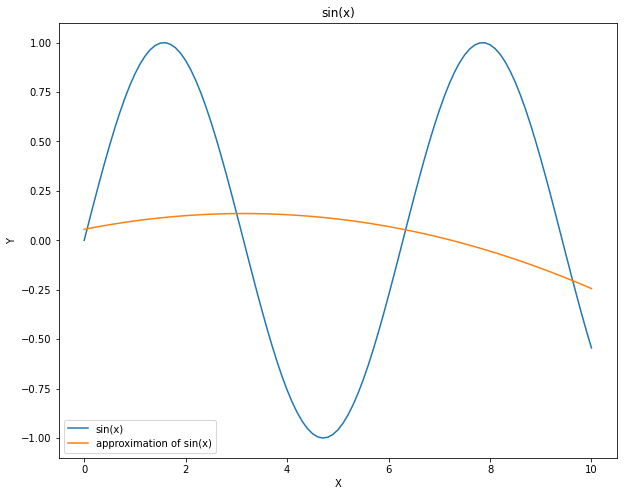

relative error for sin - approx of 2 degree: 1.51132002539450 %


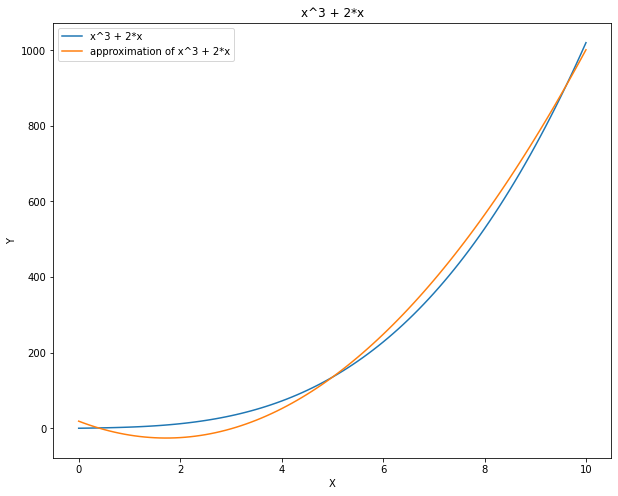

relative error for x^3 + 2*x - approx of 2 degree: 1.64907282555328 %


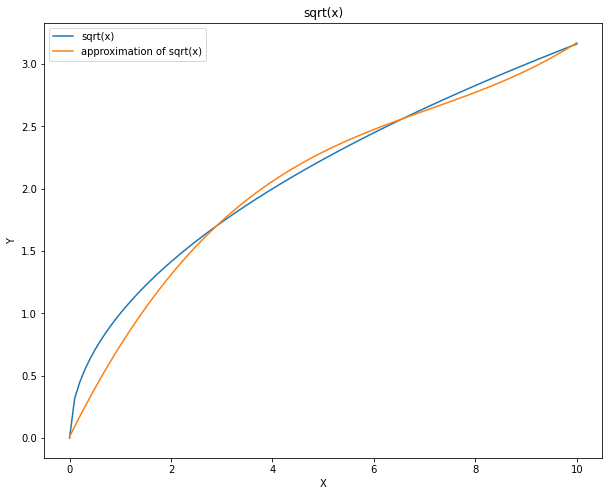

relative error for sqrt - approx of 3 degree: 0.0621546439536315 %


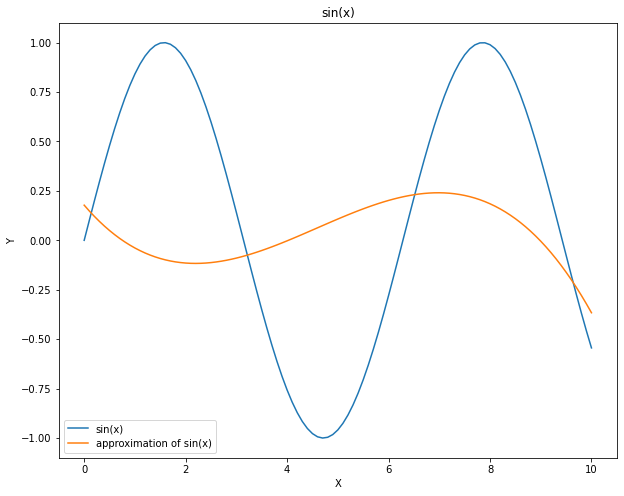

relative error for sin - approx of 3 degree: 2.62662279716071 %


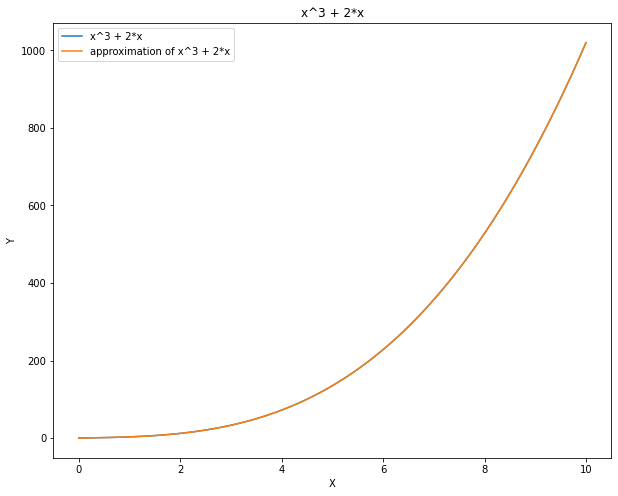

relative error for x^3 + 2*x - approx of 3 degree: 1.74792832639076E-14 %


In [11]:
square_approx_n_degree(0, 10, 4, 3, False)

**5 węzłów**

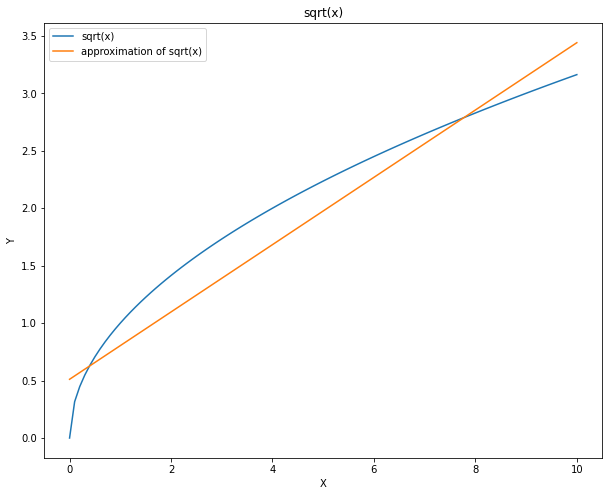

relative error for sqrt - approx of 1 degree: 0.118159135374033 %


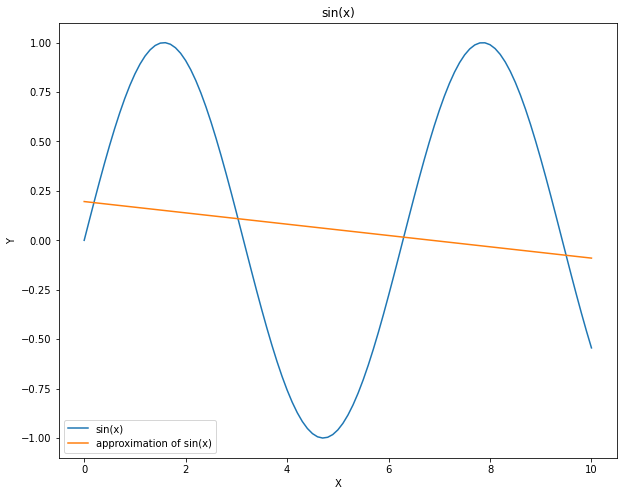

relative error for sin - approx of 1 degree: 0.845998571339456 %


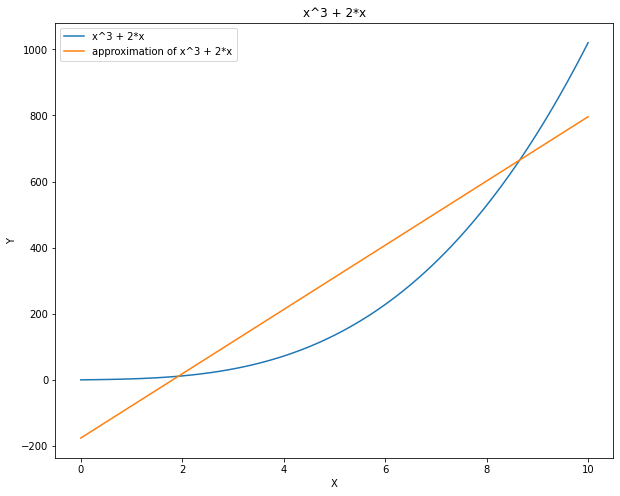

relative error for x^3 + 2*x - approx of 1 degree: 6.30868063715690 %


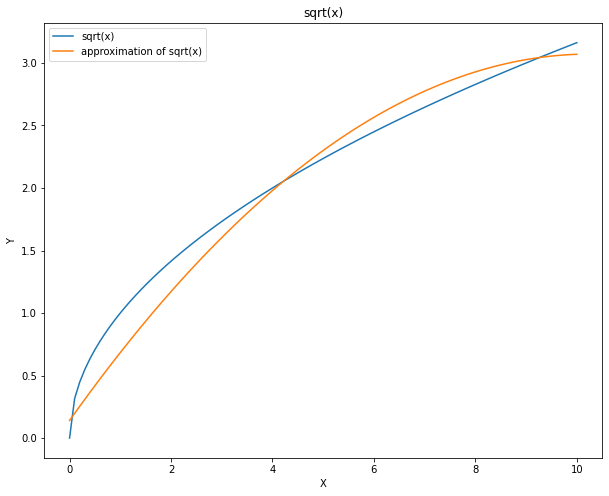

relative error for sqrt - approx of 2 degree: 0.0954433210754478 %


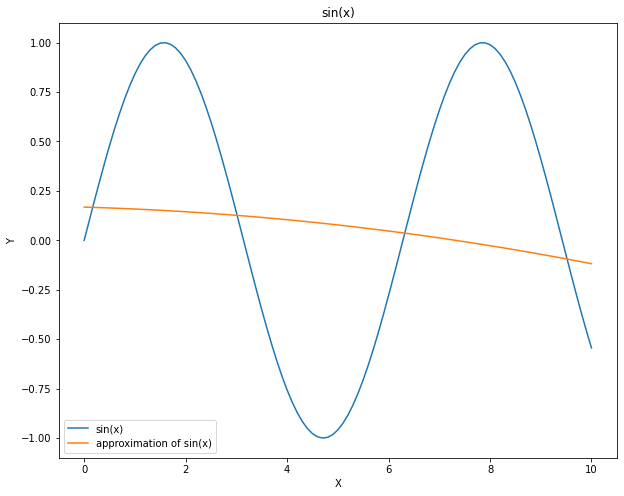

relative error for sin - approx of 2 degree: 0.829850022214384 %


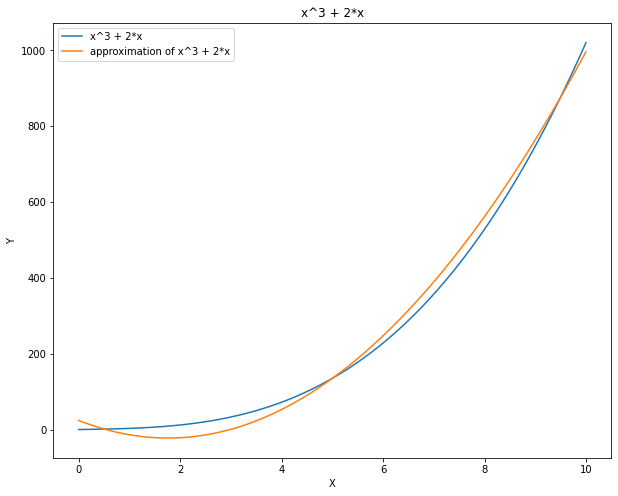

relative error for x^3 + 2*x - approx of 2 degree: 1.33901288883571 %


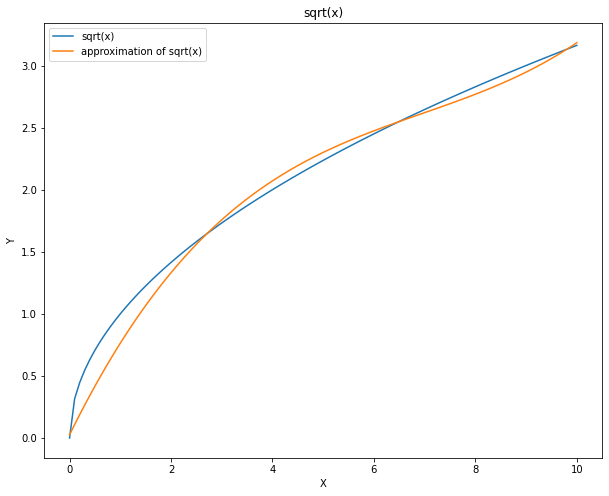

relative error for sqrt - approx of 3 degree: 0.0613943186414242 %


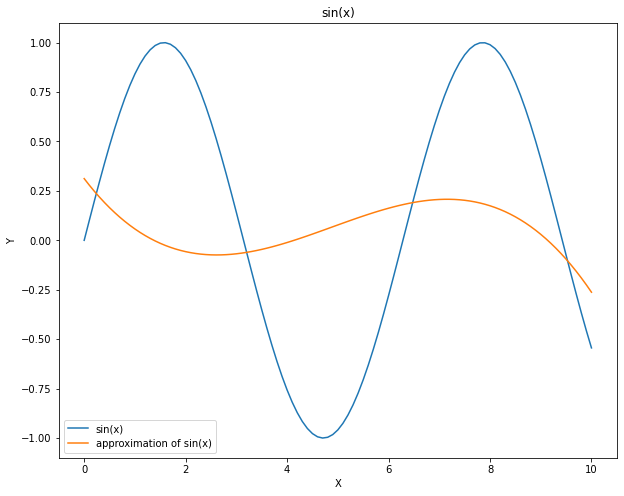

relative error for sin - approx of 3 degree: 1.02144541675973 %


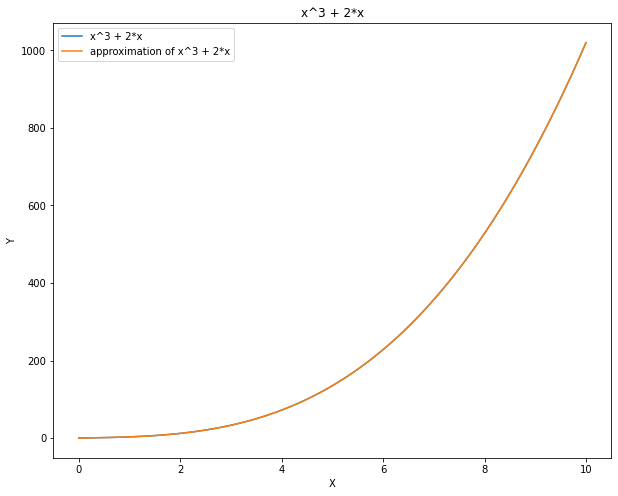

relative error for x^3 + 2*x - approx of 3 degree: 6.45416349011724E-14 %


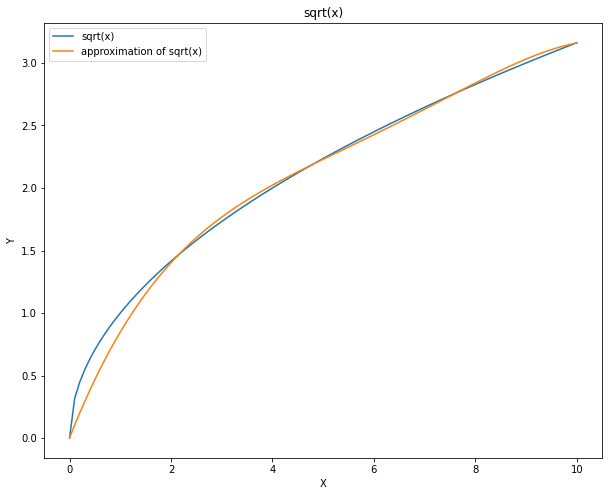

relative error for sqrt - approx of 4 degree: 0.0382718989258493 %


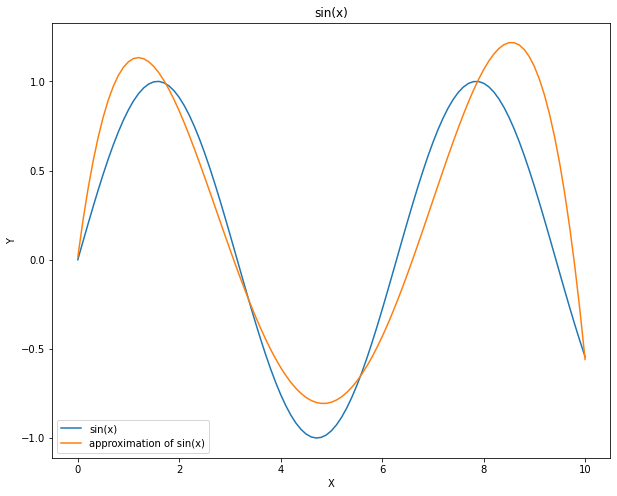

relative error for sin - approx of 4 degree: 0.641029294347542 %


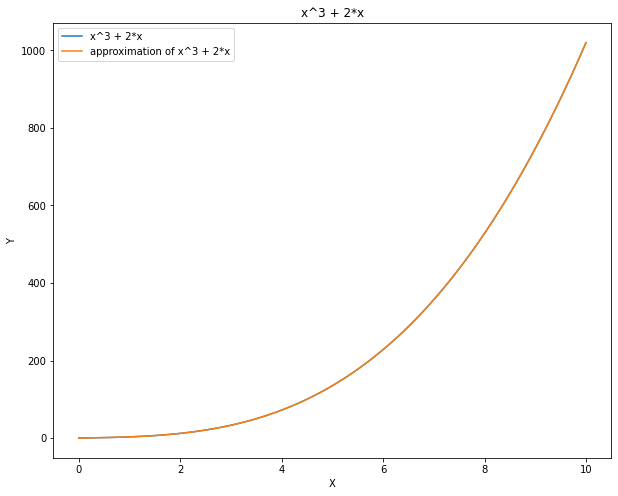

relative error for x^3 + 2*x - approx of 4 degree: 1.36485865235076E-12 %


In [12]:
square_approx_n_degree(0, 10, 5, 4, False)

**8 węzłów**

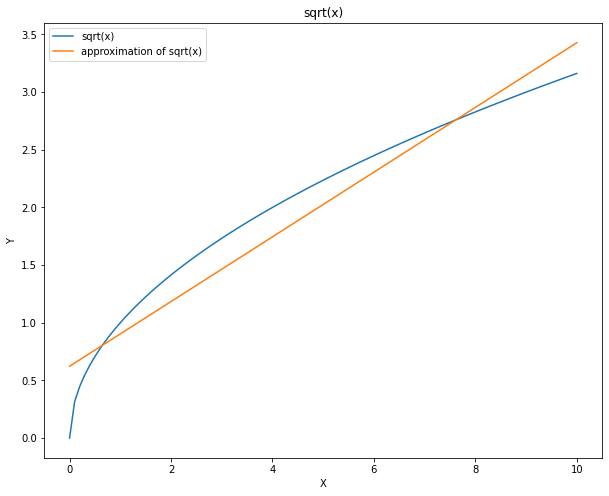

relative error for sqrt - approx of 1 degree: 0.0771463858501936 %


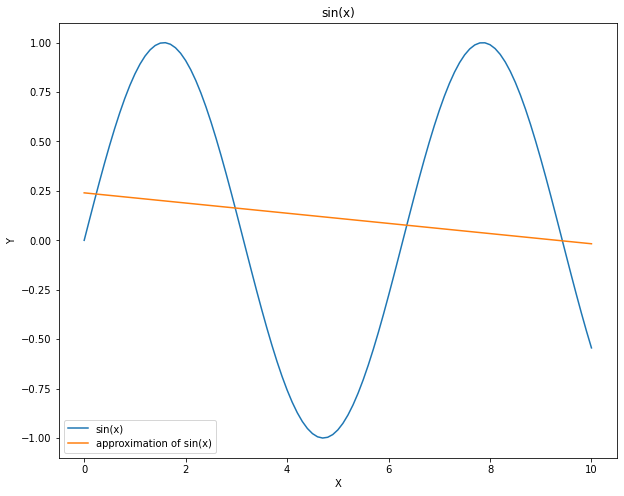

relative error for sin - approx of 1 degree: 1.90137089015491 %


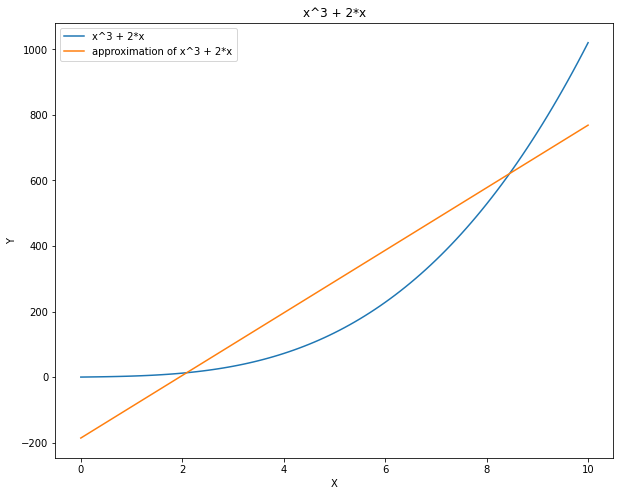

relative error for x^3 + 2*x - approx of 1 degree: 11.5282167351961 %


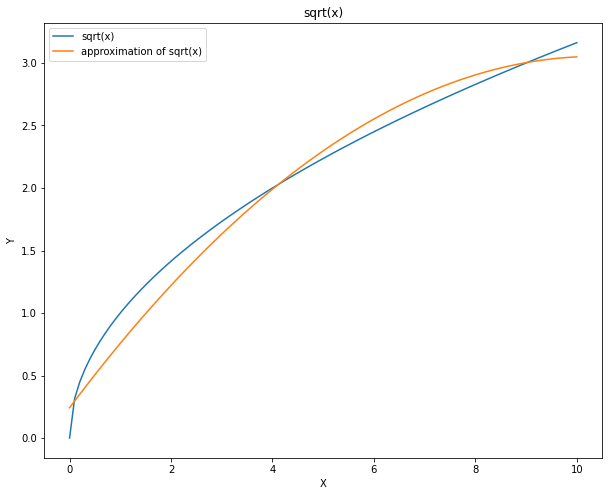

relative error for sqrt - approx of 2 degree: 0.0753273626841496 %


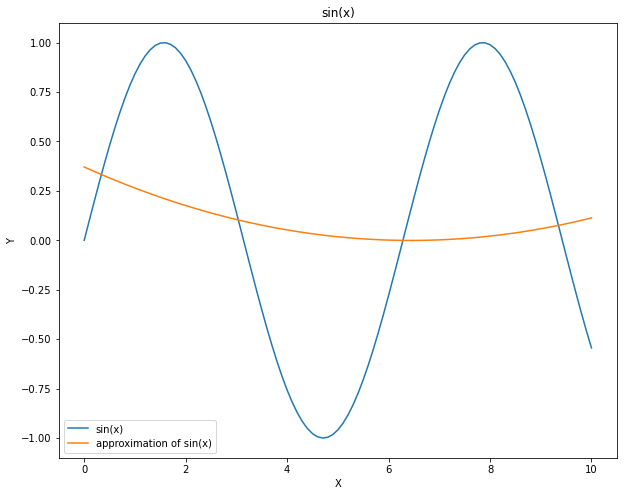

relative error for sin - approx of 2 degree: 1.34355449579138 %


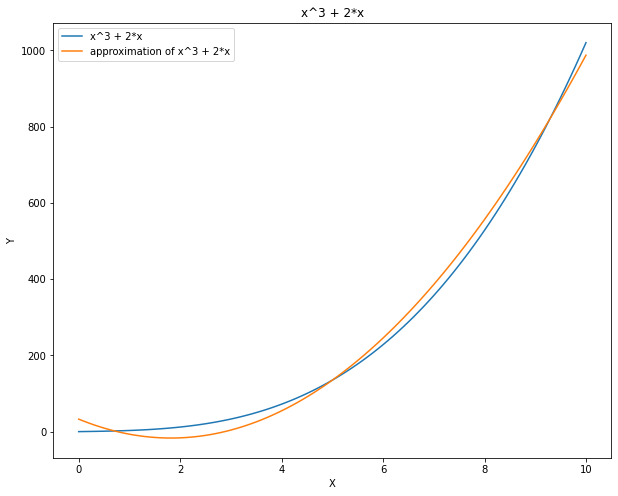

relative error for x^3 + 2*x - approx of 2 degree: 0.719628456788733 %


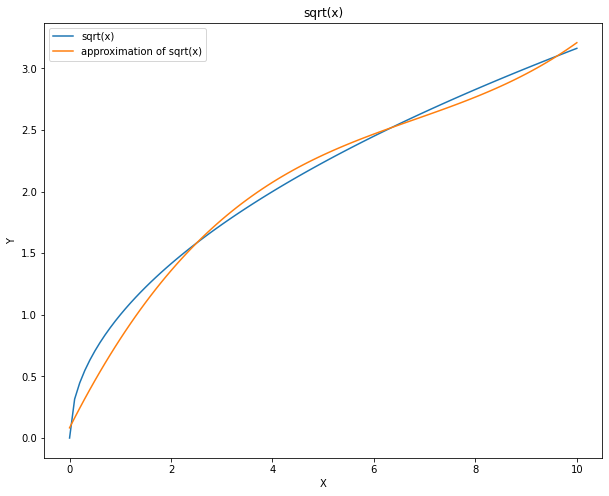

relative error for sqrt - approx of 3 degree: 0.0582824283611998 %


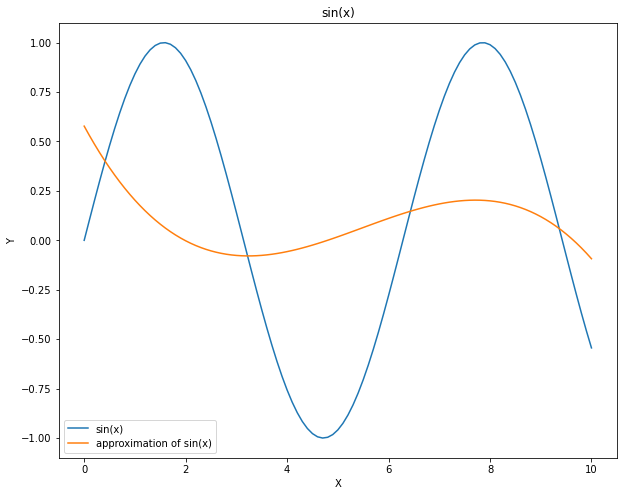

relative error for sin - approx of 3 degree: 1.36029891657368 %


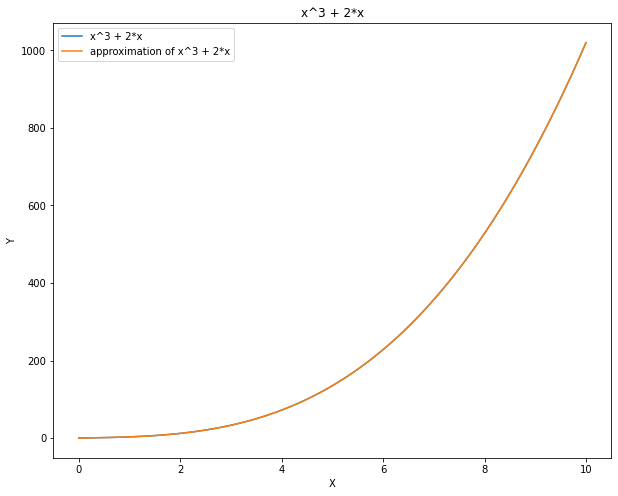

relative error for x^3 + 2*x - approx of 3 degree: 5.48326767021569E-14 %


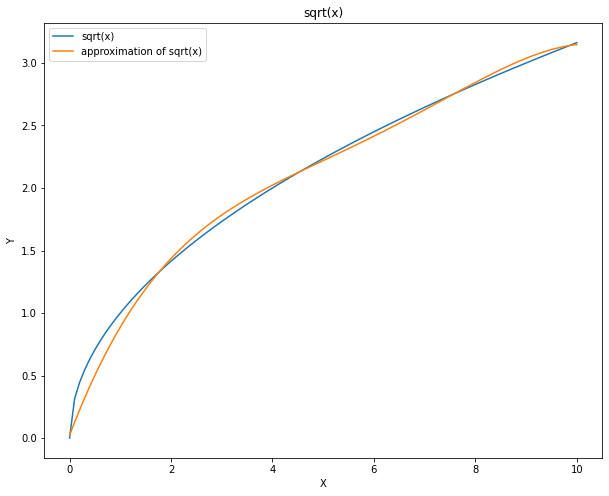

relative error for sqrt - approx of 4 degree: 0.0389122063537663 %


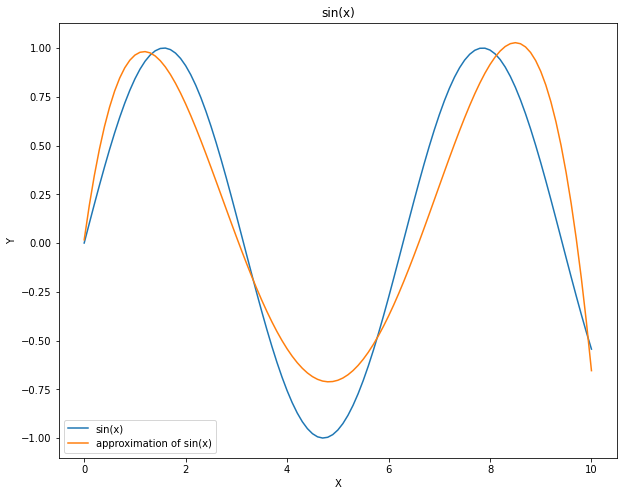

relative error for sin - approx of 4 degree: 1.94330912294451 %


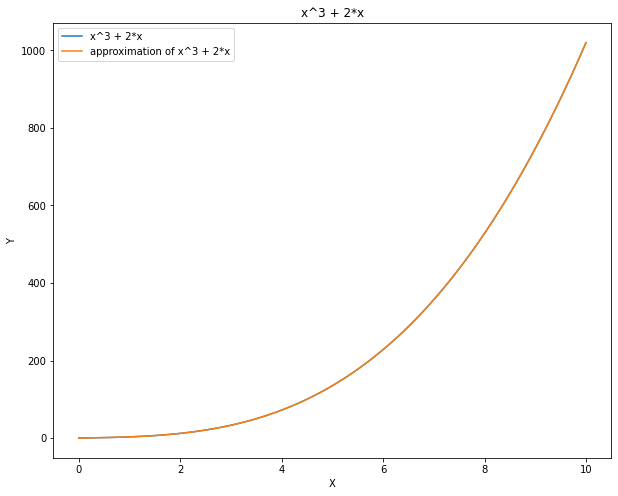

relative error for x^3 + 2*x - approx of 4 degree: 9.67305617072092E-13 %


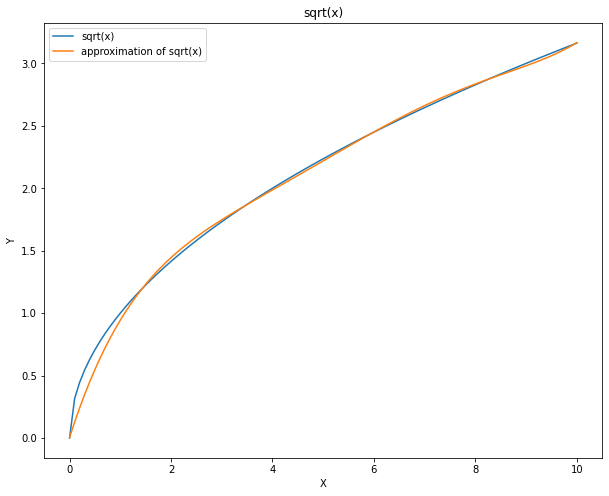

relative error for sqrt - approx of 5 degree: 0.0272462645426230 %


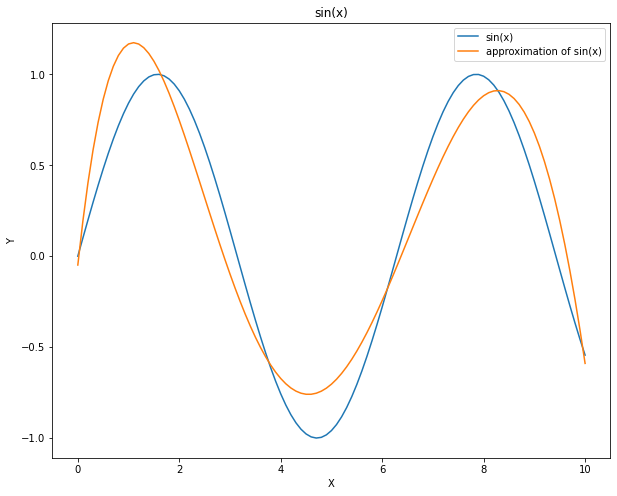

relative error for sin - approx of 5 degree: 2.53926741633449 %


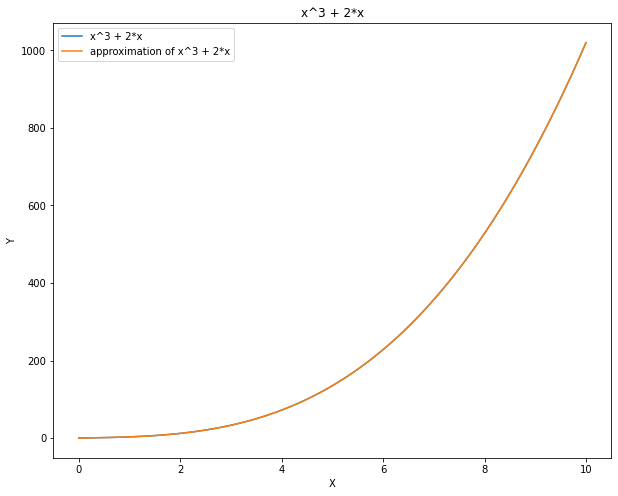

relative error for x^3 + 2*x - approx of 5 degree: 4.04953907020819E-12 %


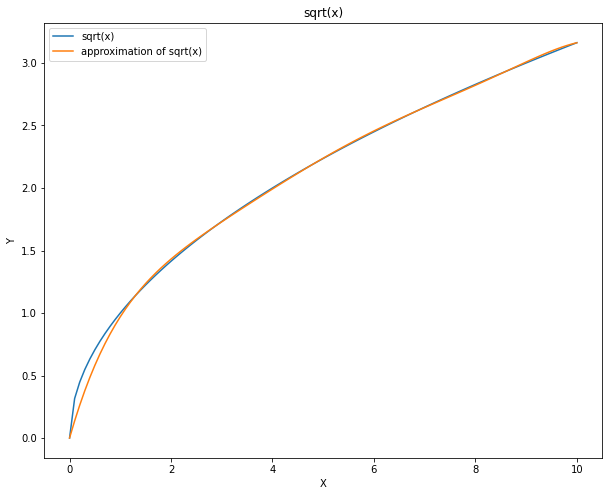

relative error for sqrt - approx of 6 degree: 0.0186066015944306 %


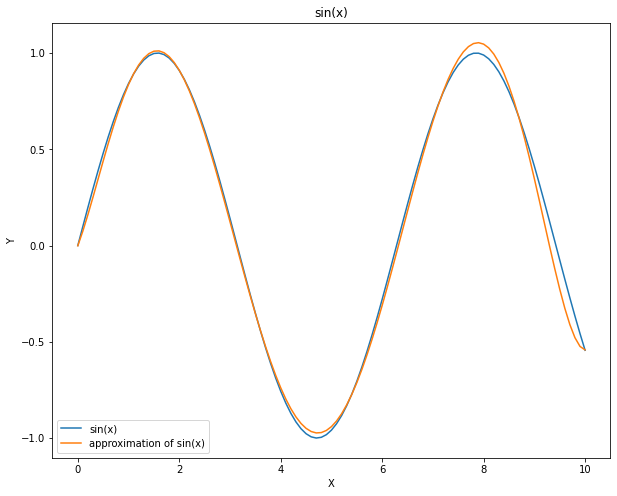

relative error for sin - approx of 6 degree: 0.491160527388090 %


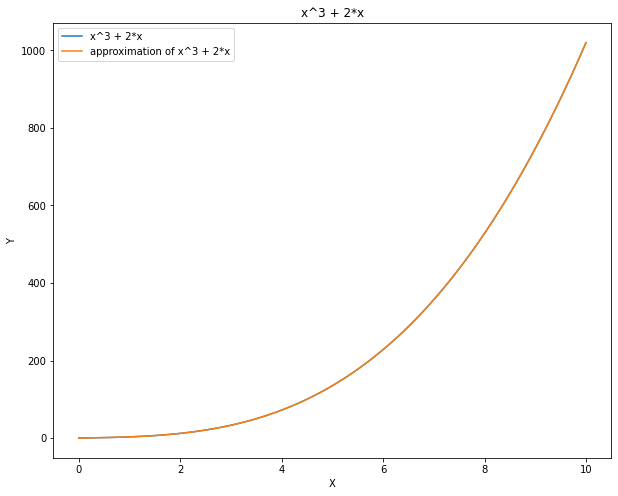

relative error for x^3 + 2*x - approx of 6 degree: 2.05473500809516E-11 %


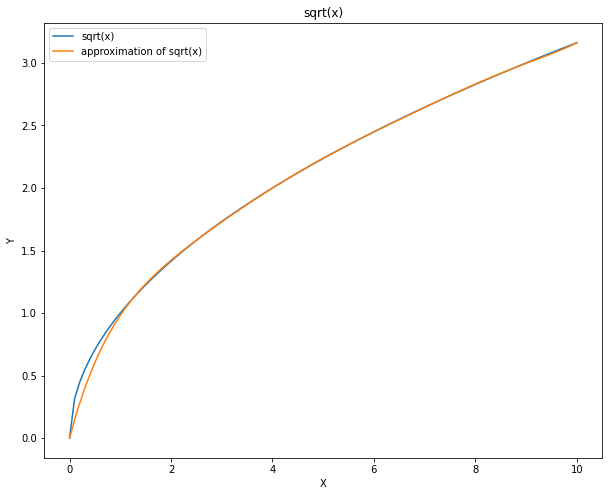

relative error for sqrt - approx of 7 degree: 0.0135856843954589 %


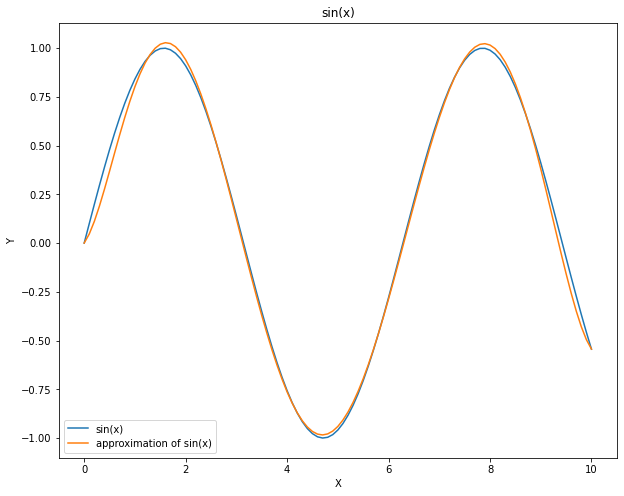

relative error for sin - approx of 7 degree: 0.363766462170980 %


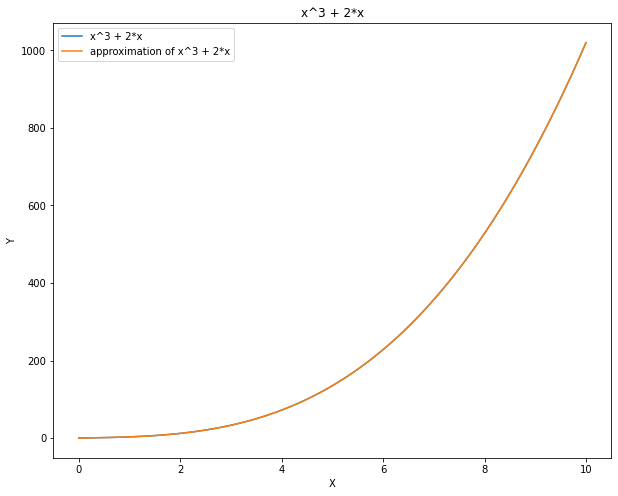

relative error for x^3 + 2*x - approx of 7 degree: 2.40734791138628E-11 %


In [13]:
square_approx_n_degree(0, 10, 8, 7, False)

**Przypadki zachorowania na COVID-19 w Japonii:**

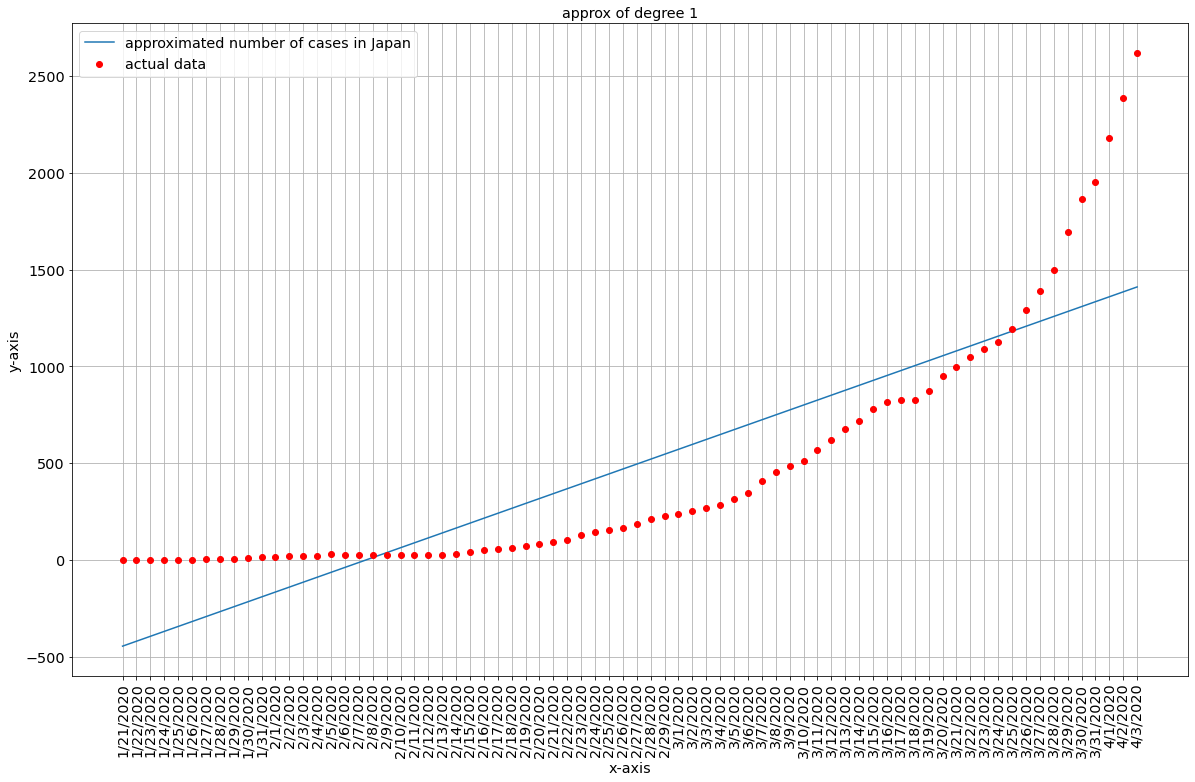

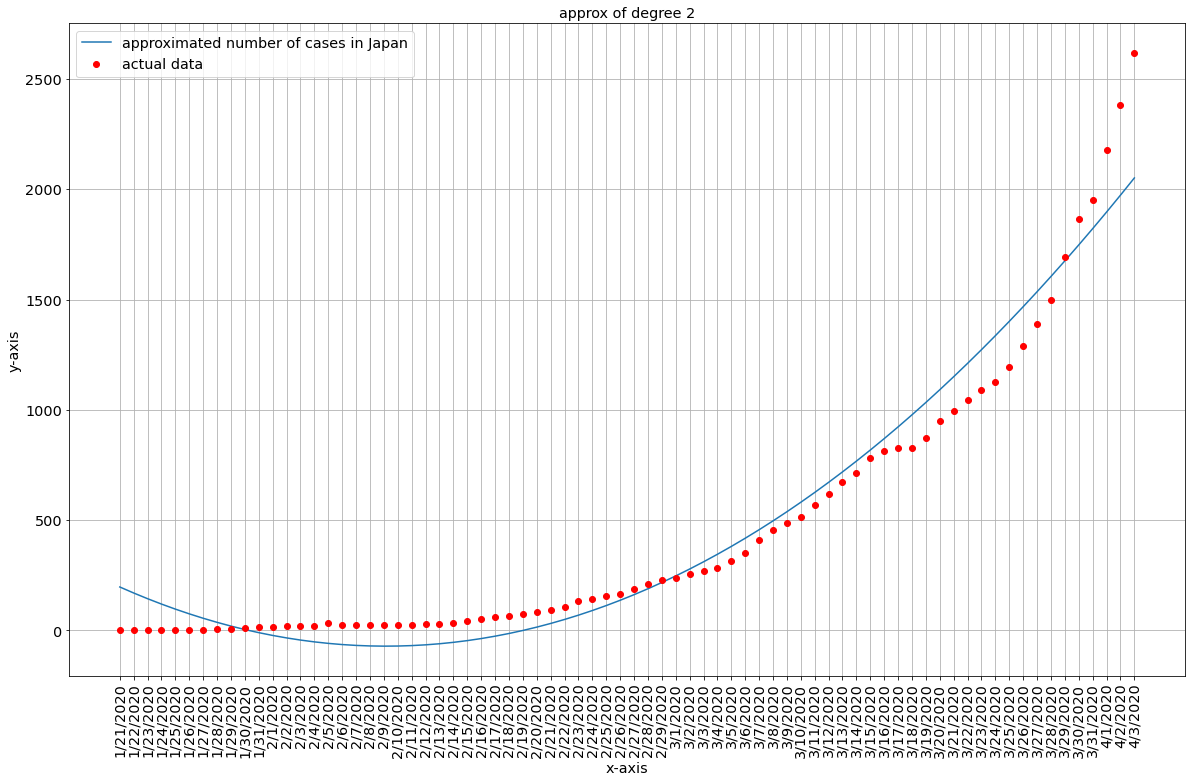

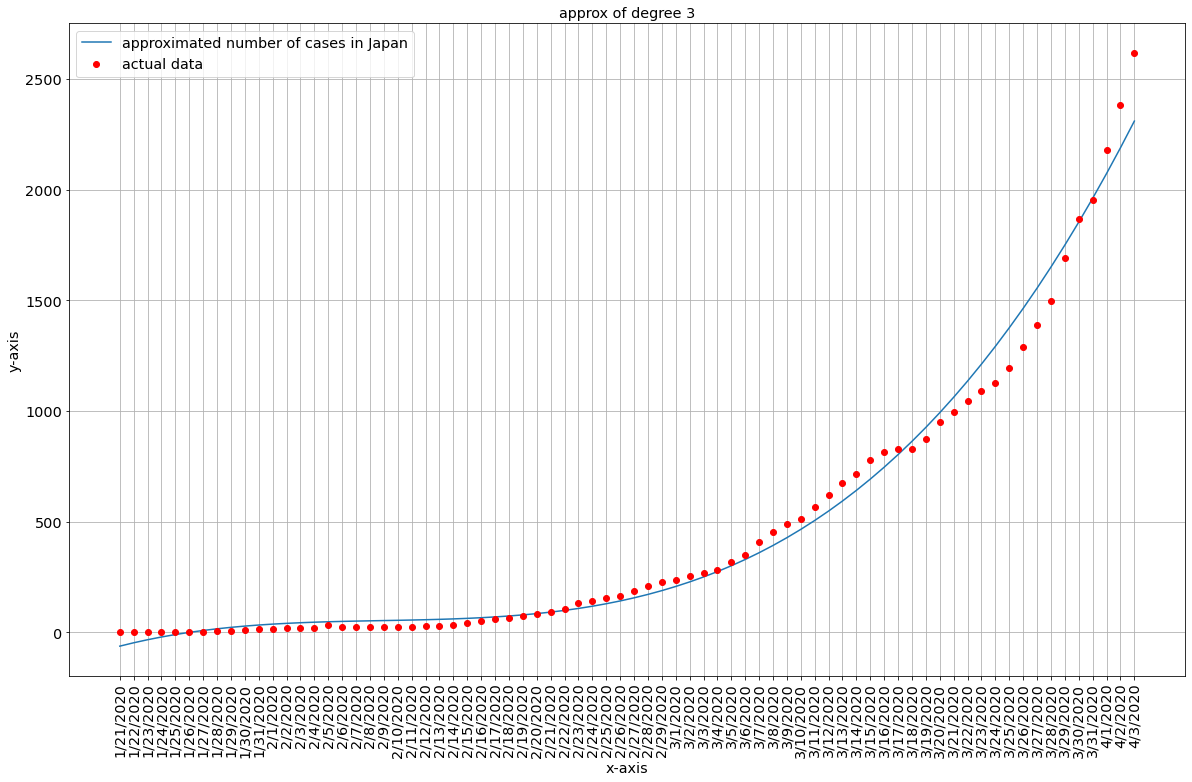

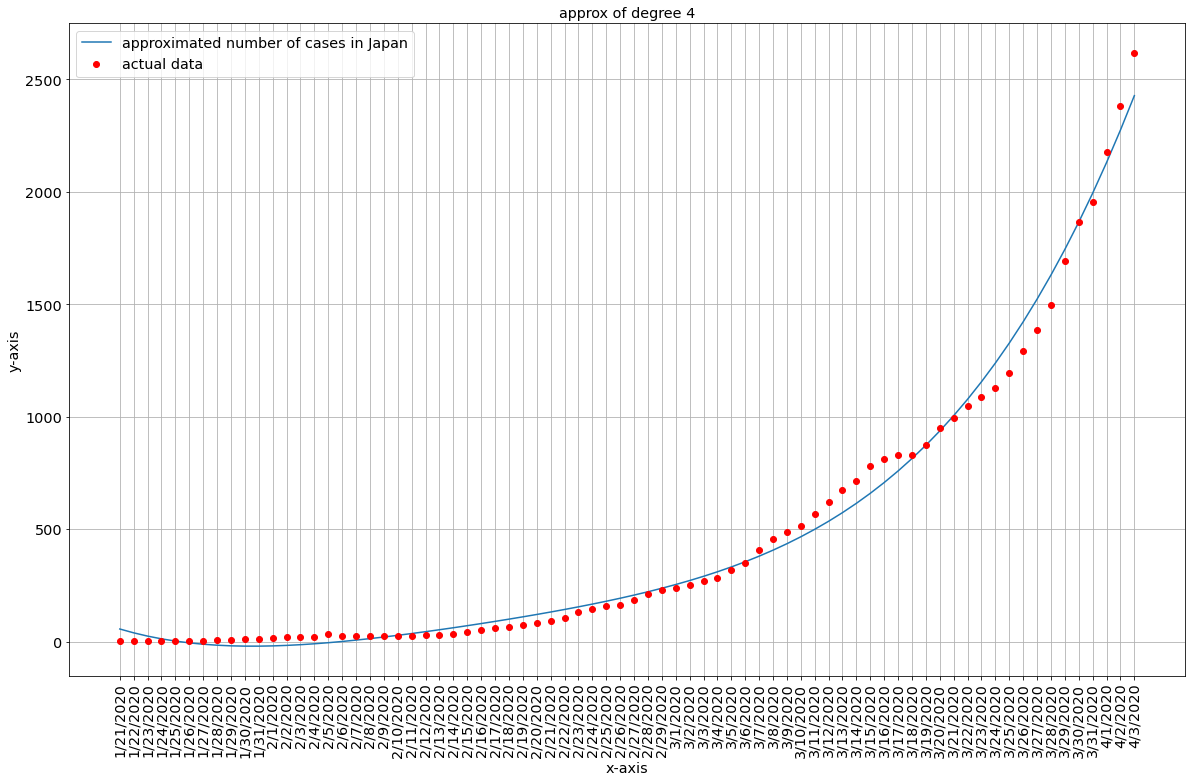

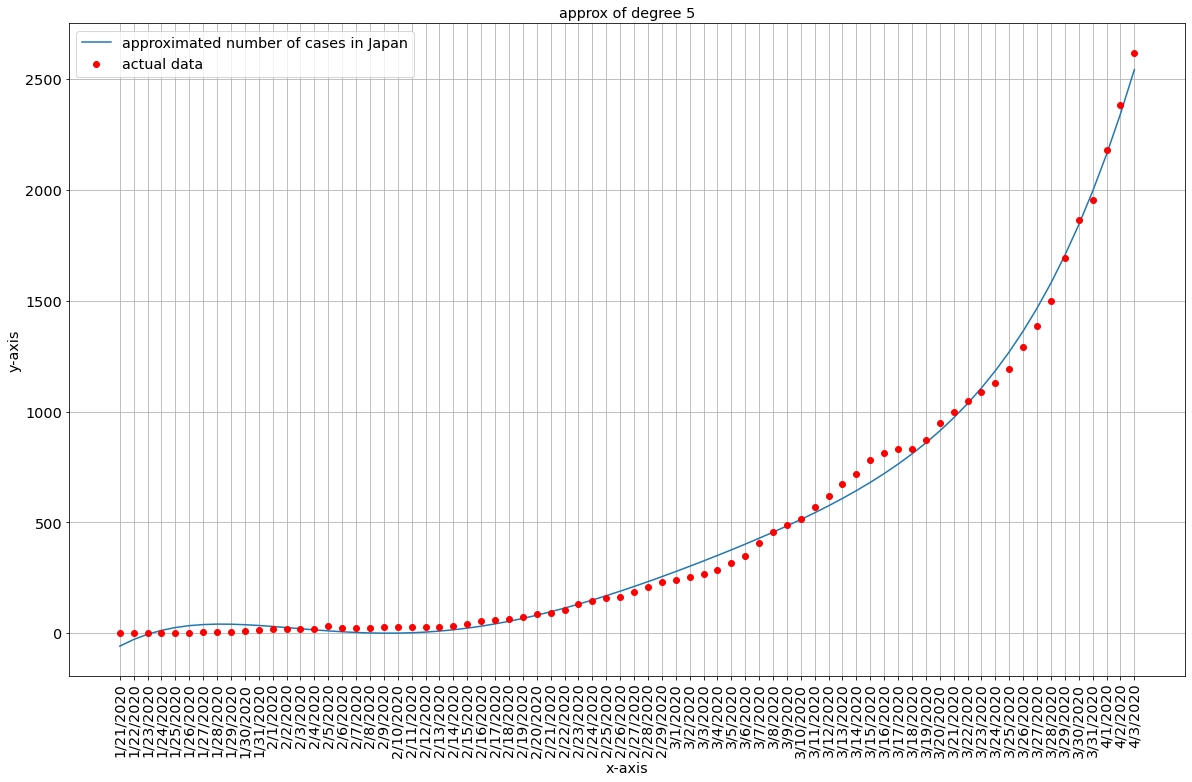

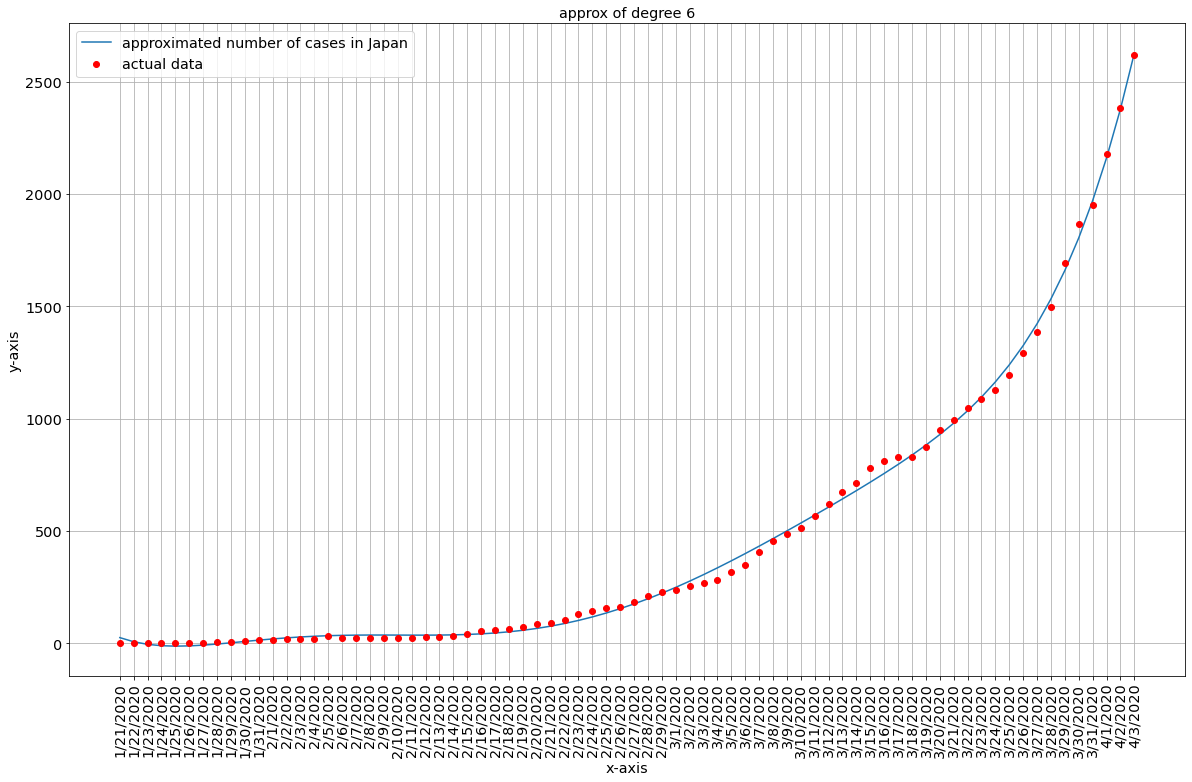

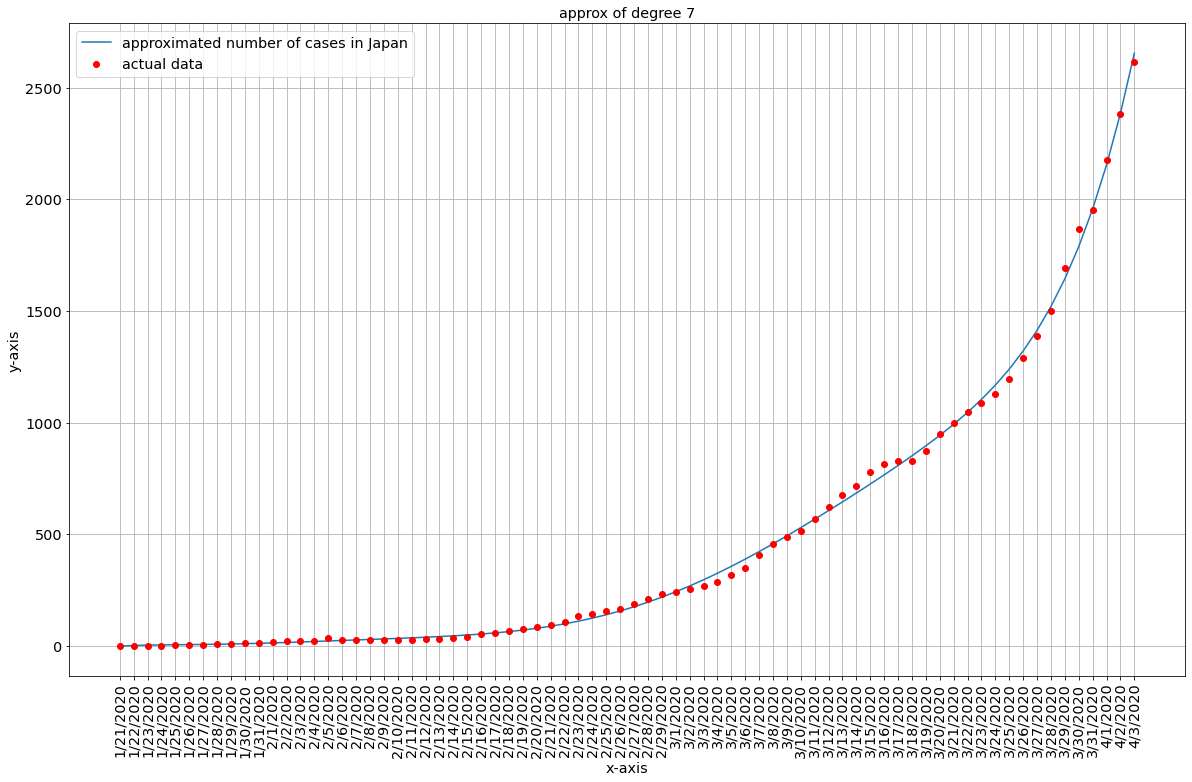

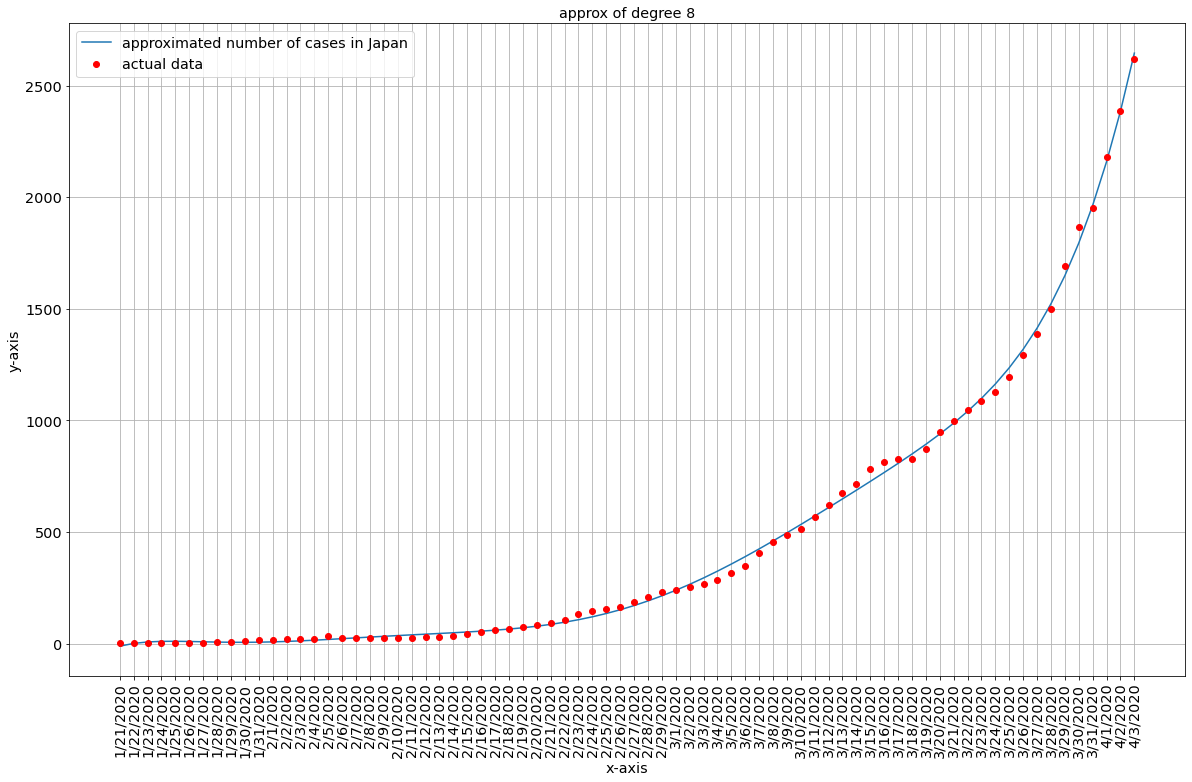

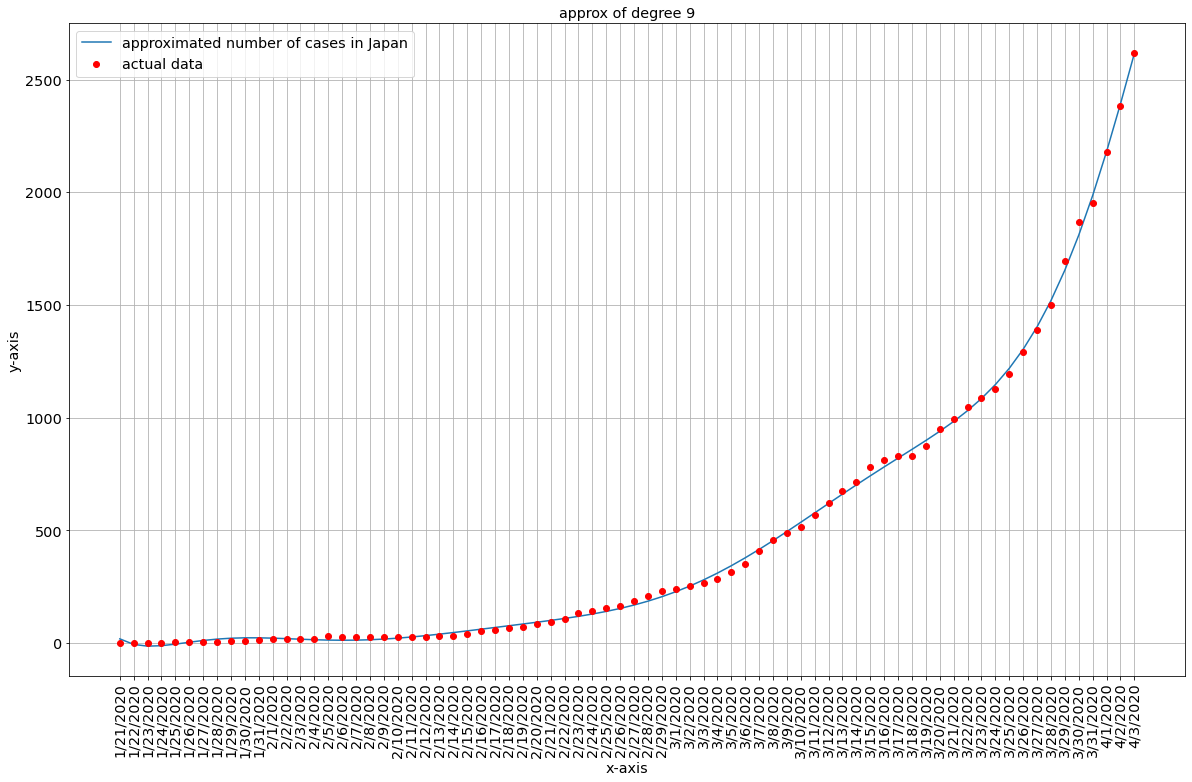

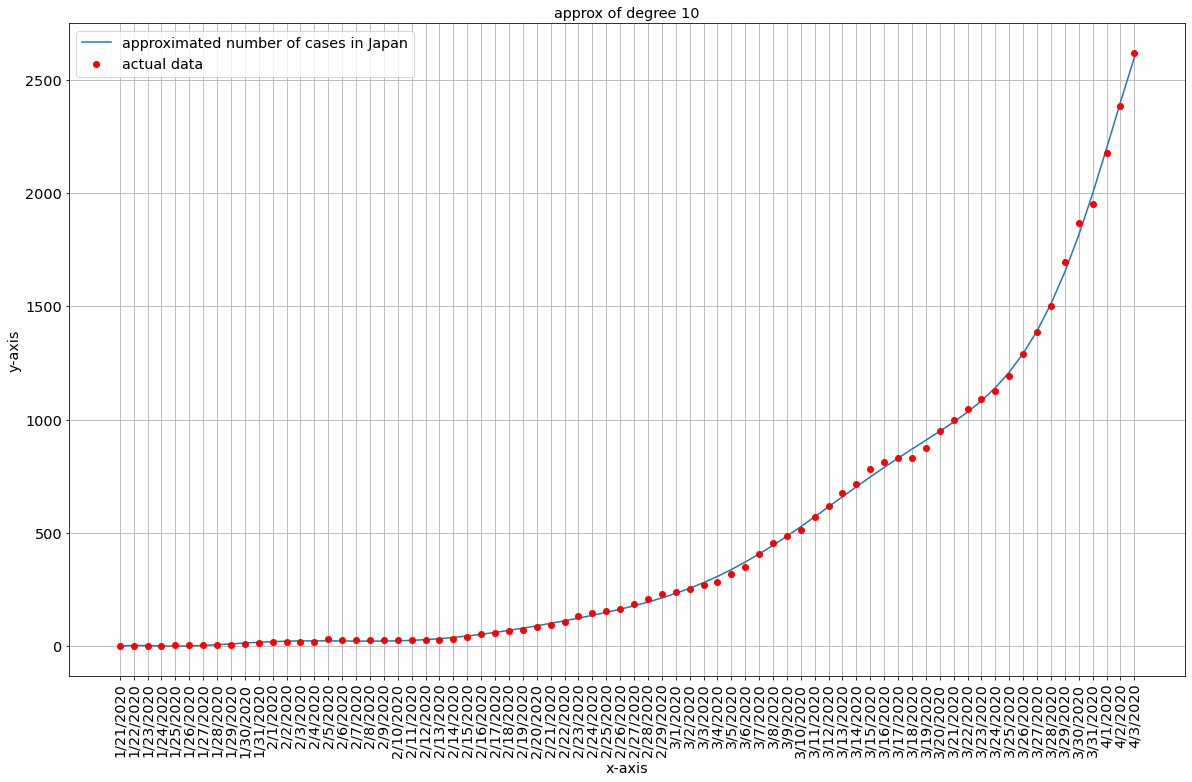

In [18]:
def calculate_values(polynomial, scope):
  values = []
  for number in scope:
    values.append(eval(polynomial, number))
  return values

cases = [1,1,1,1,3,3,4,6,7,11,14,17,20,20,20,33,25,25,25,26,26,26,28,29,33,41,53,59,65,73,85,93,105,132,144,157,164,186,210,230,239,254,268,284,317,349,408,455,488,514,568,620,675,716,780,814,829,829,873,950,996,1046,1089,1128,1193,1291,1387,1499,1693,1866,1953,2178,2384,2617]
dates = ['1/21/2020','1/22/2020','1/23/2020','1/24/2020','1/25/2020','1/26/2020','1/27/2020','1/28/2020','1/29/2020','1/30/2020','1/31/2020','2/1/2020','2/2/2020','2/3/2020','2/4/2020','2/5/2020','2/6/2020','2/7/2020','2/8/2020','2/9/2020','2/10/2020','2/11/2020','2/12/2020','2/13/2020','2/14/2020','2/15/2020','2/16/2020','2/17/2020','2/18/2020','2/19/2020','2/20/2020','2/21/2020','2/22/2020','2/23/2020','2/24/2020','2/25/2020','2/26/2020','2/27/2020','2/28/2020','2/29/2020','3/1/2020','3/2/2020','3/3/2020','3/4/2020','3/5/2020','3/6/2020','3/7/2020','3/8/2020','3/9/2020','3/10/2020','3/11/2020','3/12/2020','3/13/2020','3/14/2020','3/15/2020','3/16/2020','3/17/2020','3/18/2020','3/19/2020','3/20/2020','3/21/2020','3/22/2020','3/23/2020','3/24/2020','3/25/2020','3/26/2020','3/27/2020','3/28/2020','3/29/2020','3/30/2020','3/31/2020','4/1/2020','4/2/2020','4/3/2020']


def coronavirus_approx(dates, cases, degree):
    for i in range(1, degree + 1):
        cases_polynomial = square_approx_polynomial(np.linspace(1, len(cases), len(cases)), cases, i)
        cases_values = calculate_values(cases_polynomial, np.linspace(1, len(cases), len(cases)))

        params = {'legend.fontsize': 'x-large',
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
        plt.rcParams.update(params)
        plt.title(f'approx of degree {i}')
        plt.plot(dates, cases_values, label="approximated number of cases in Japan")
        plt.plot(dates, cases, 'ro', label="actual data")
        plt.grid(True, which='both')
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

coronavirus_approx(dates, cases, 10)

**Wnioski**
Im wyższy stopień wielomianu aproksumującego, tym dokładniejsze wyniki otrzymujemy. Stopień wielomianu aproksymującego powinien być odpowiednio mniejszy od liczby węzłów, by niwelować (wygładzać) pojawiające się błędy pomiarowe.

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python.

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compare_charts(x_values, y_values, x_data, y_data, function_name):
    params = {'legend.fontsize': 'x-large',
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
    plt.rcParams.update(params)
    plt.plot(x_values, y_values, label="approx of "+ function_name)
    plt.plot(x_data, y_data, 'or', label="actual values of " + function_name)
    plt.grid(True, which='both')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

def python_approx(min, max, n, degree):

    x_sqrt, y_sqrt = to_table(min, max, n, math.sqrt)
    x_sin, y_sin = to_table(min, max, n, math.sin)
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f = to_table(min, max, n, f)

    for i in range(1, degree + 1):
        print("degree of approx:", i)

        sqrt_polynomial = np.polyfit(x_sqrt, y_sqrt, deg=i, full=True)
        sin_polynomial = np.polyfit(x_sin, y_sin, deg=i, full=True)
        f_polynomial = np.polyfit(x_f, y_f, deg=i, full=True)

        sqrt_eval = np.polyval(sqrt_polynomial[0], x_sqrt)
        sin_eval = np.polyval(sin_polynomial[0], x_sin)
        f_eval = np.polyval(f_polynomial[0], x_f)

        compare_charts(x_sqrt, sqrt_eval, x_sqrt, y_sqrt, "sqrt(x)")
        compare_charts(x_sin, sin_eval, x_sin, y_sin, "sin(x)")
        compare_charts(x_f, f_eval, x_f, y_f, "x^3 + 2*x")


degree of approx: 1


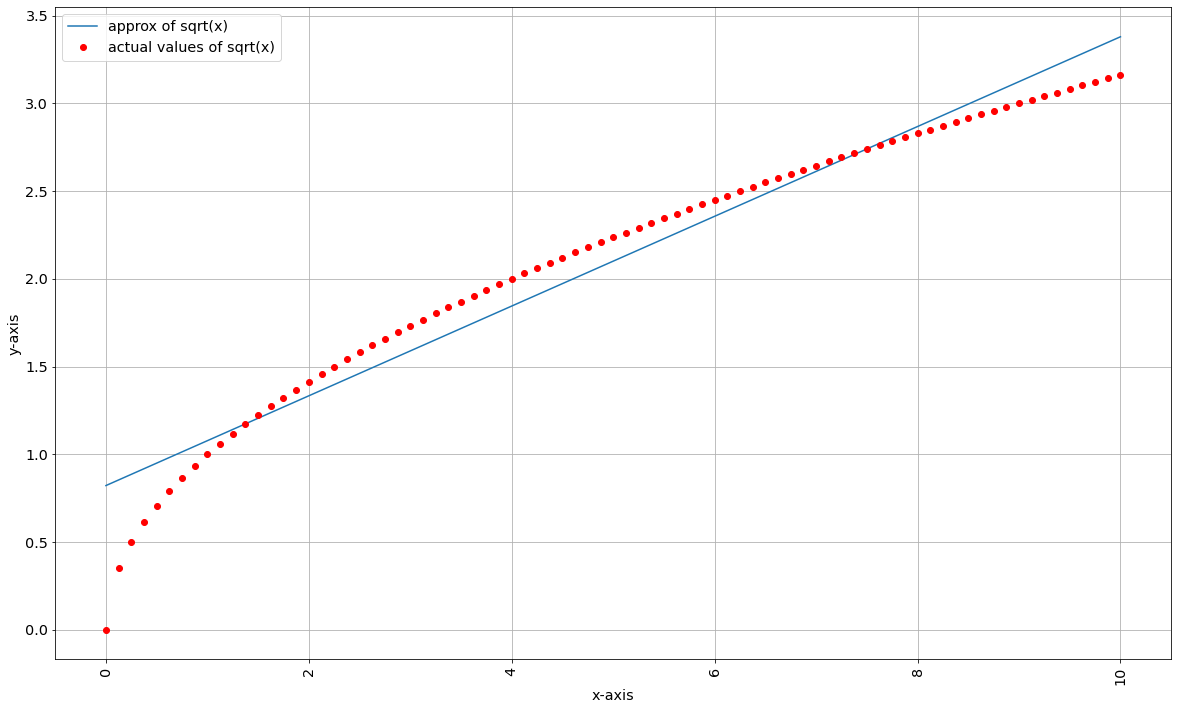

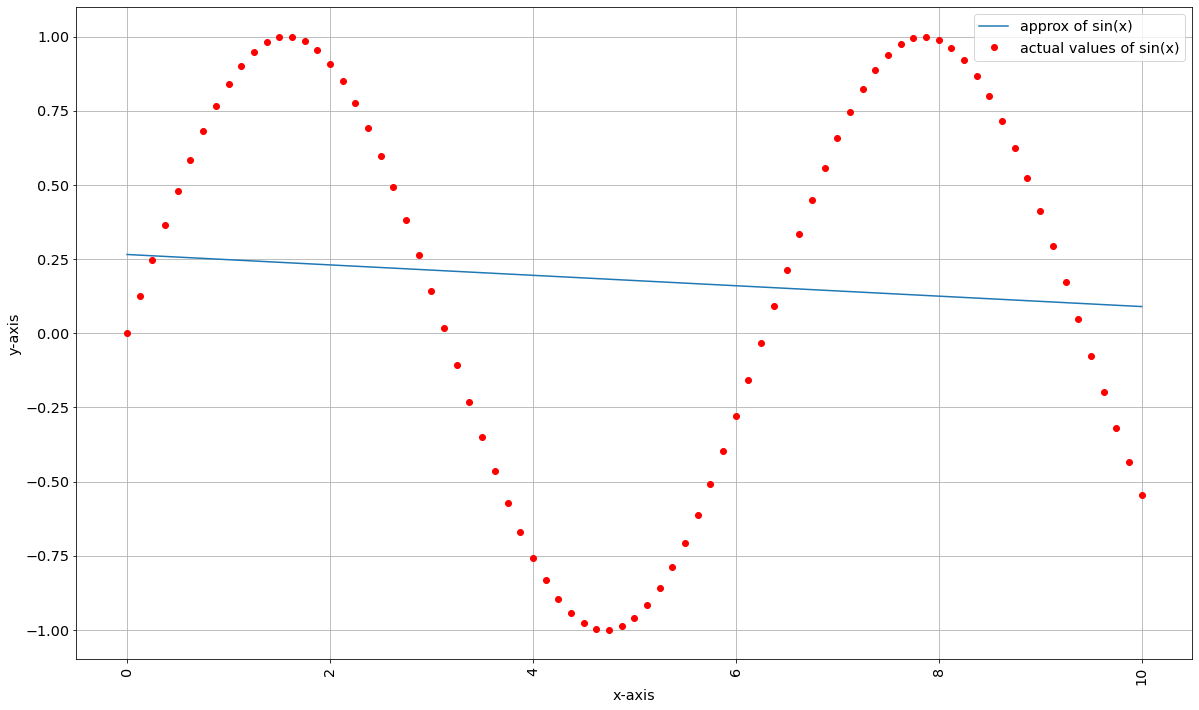

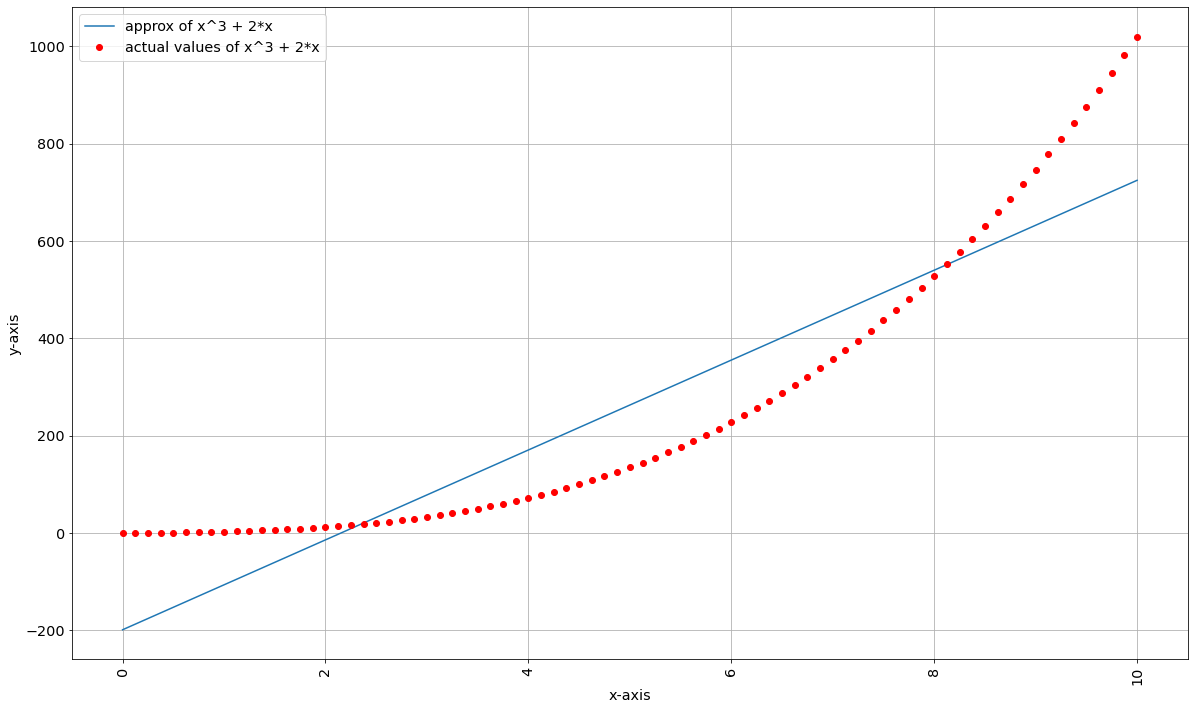

degree of approx: 2


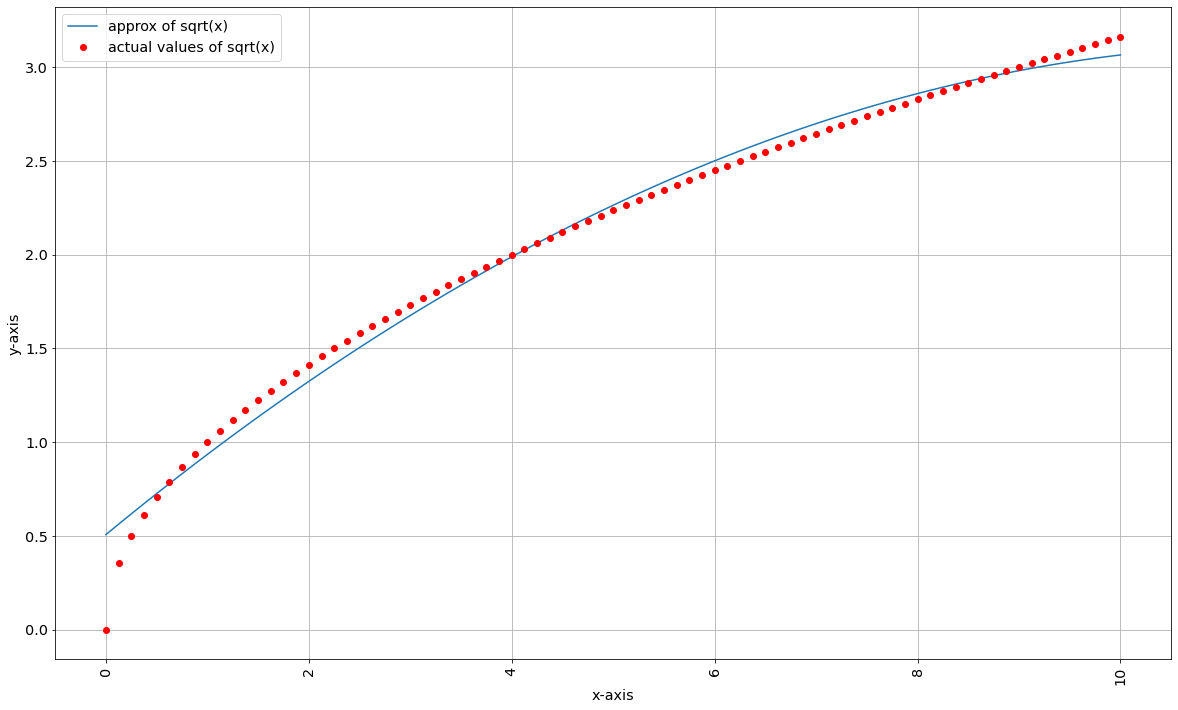

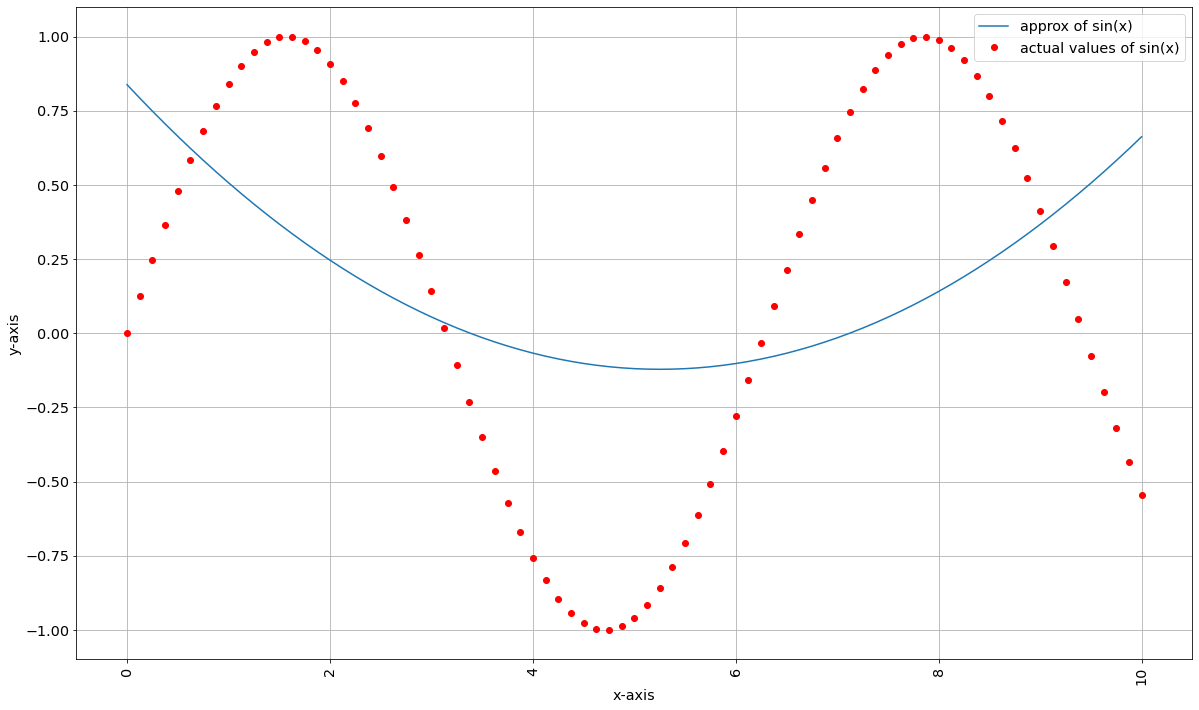

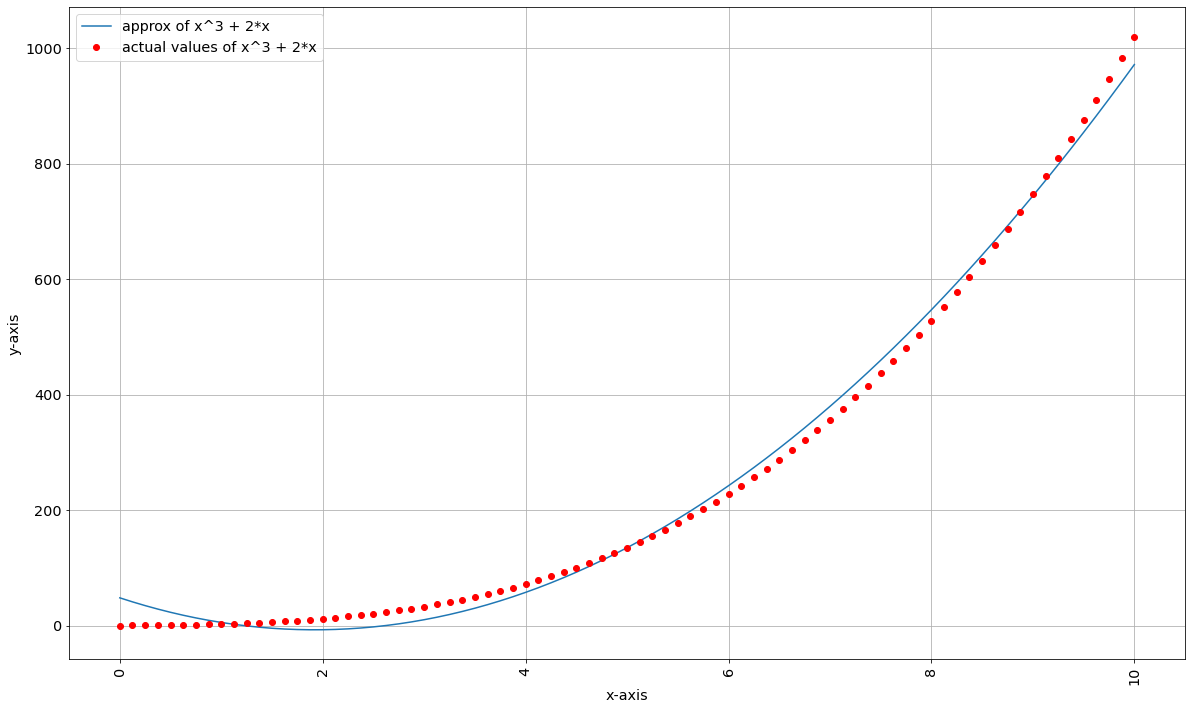

degree of approx: 3


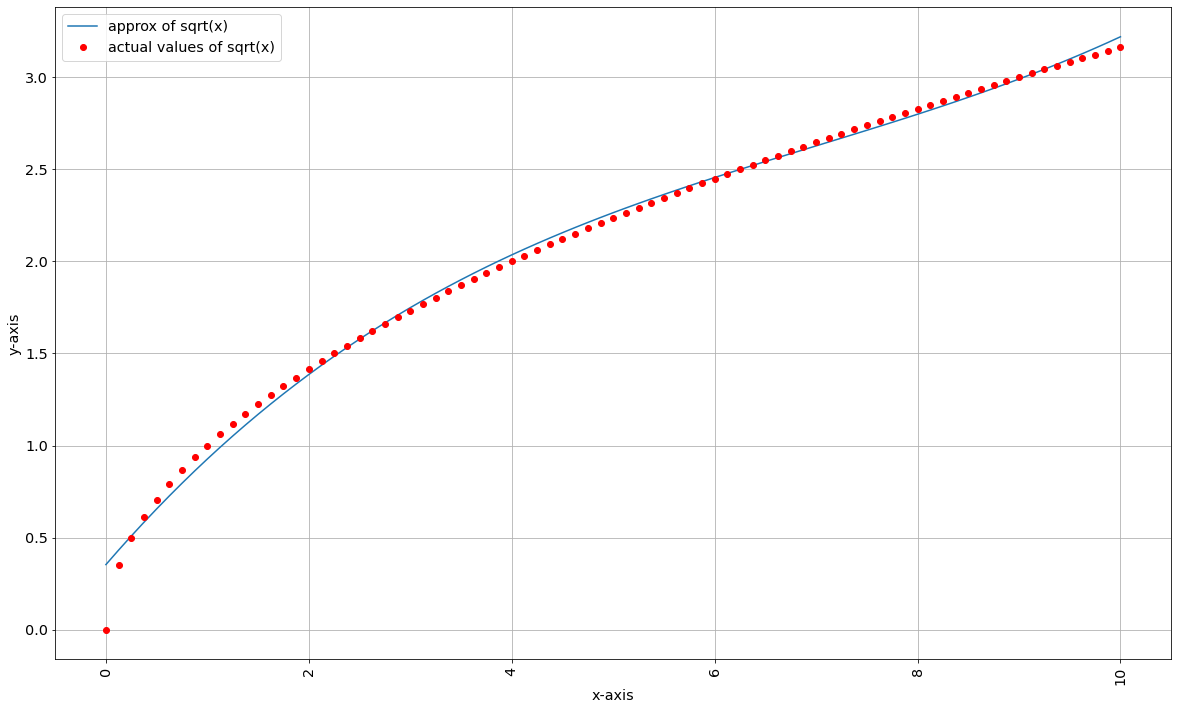

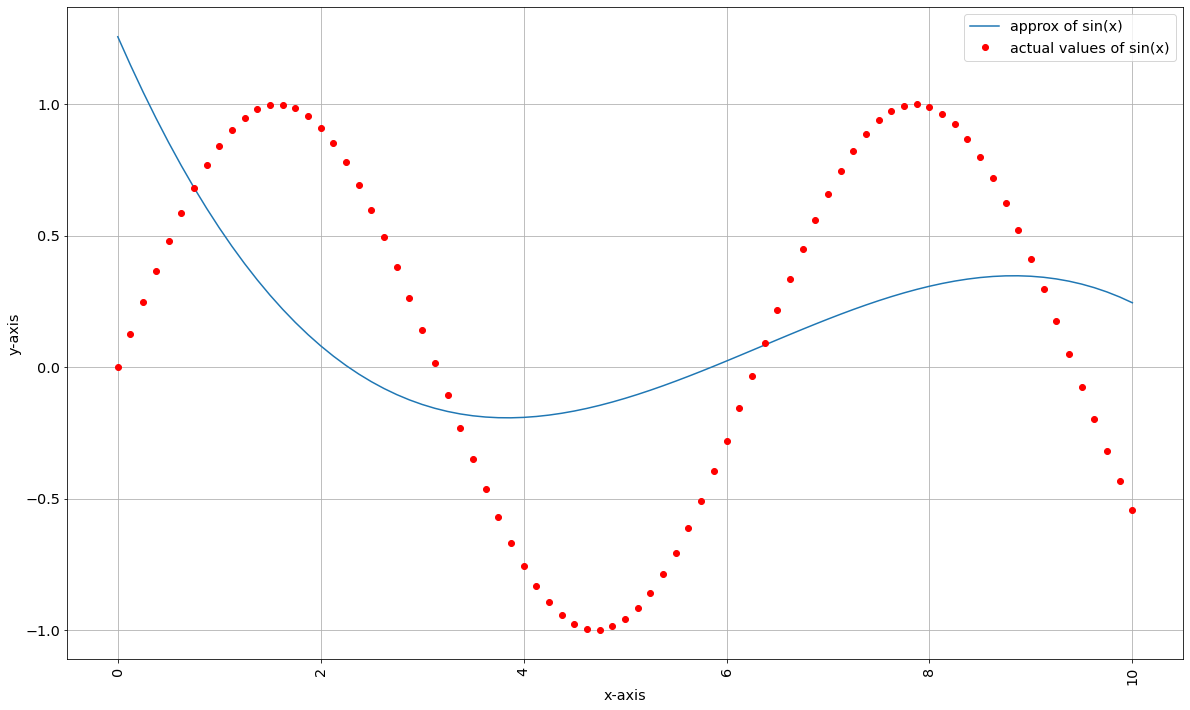

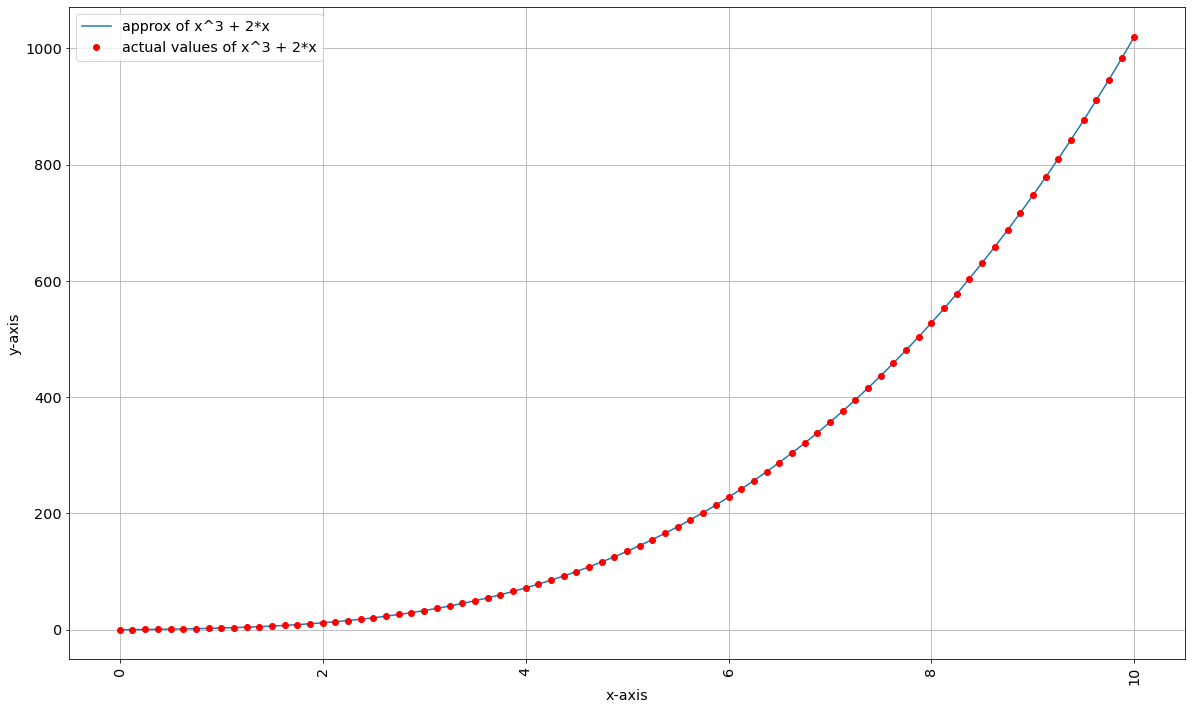

degree of approx: 4


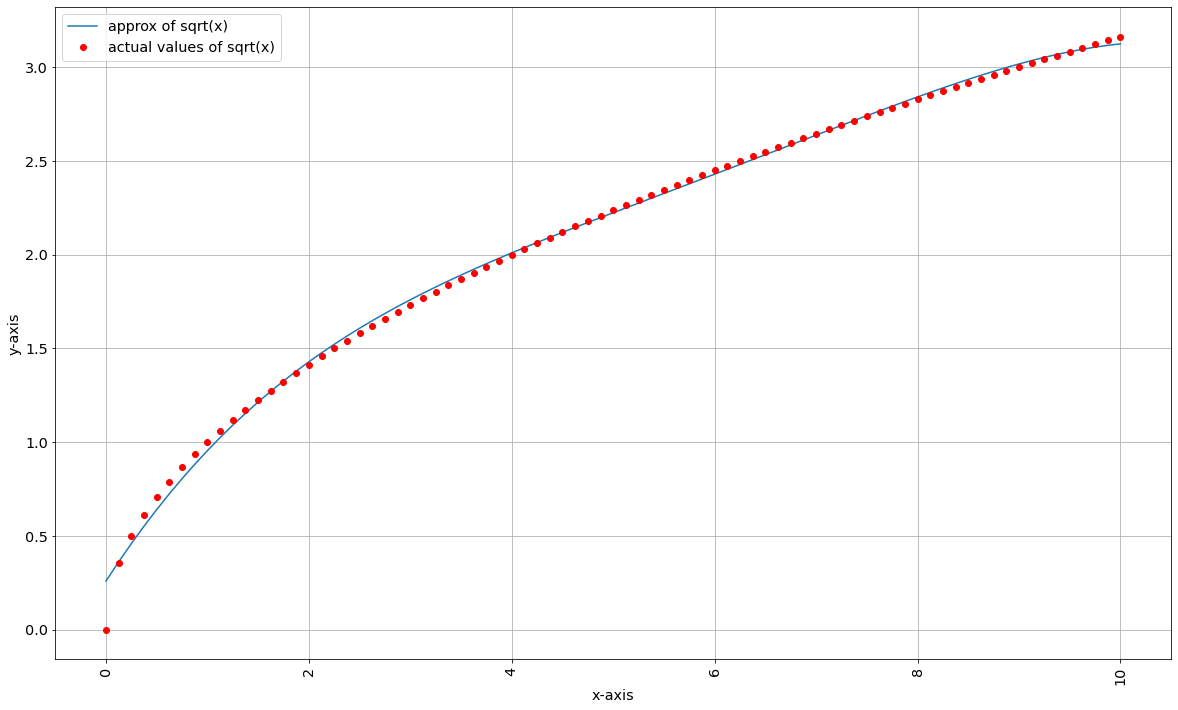

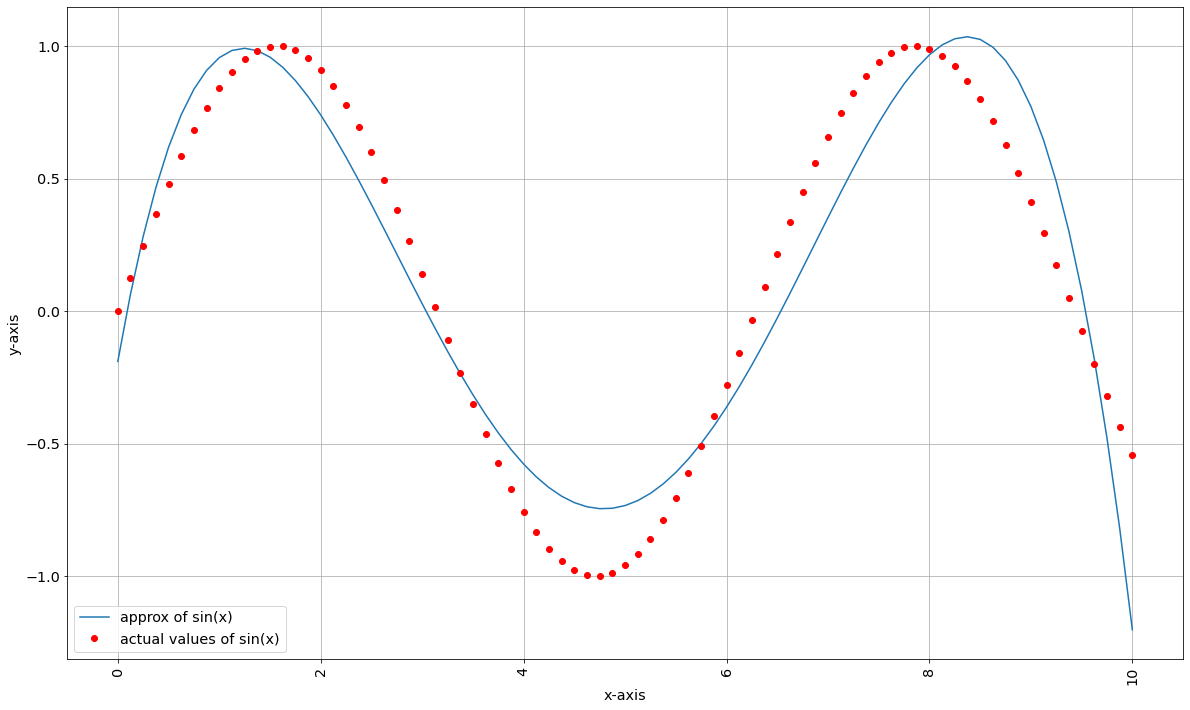

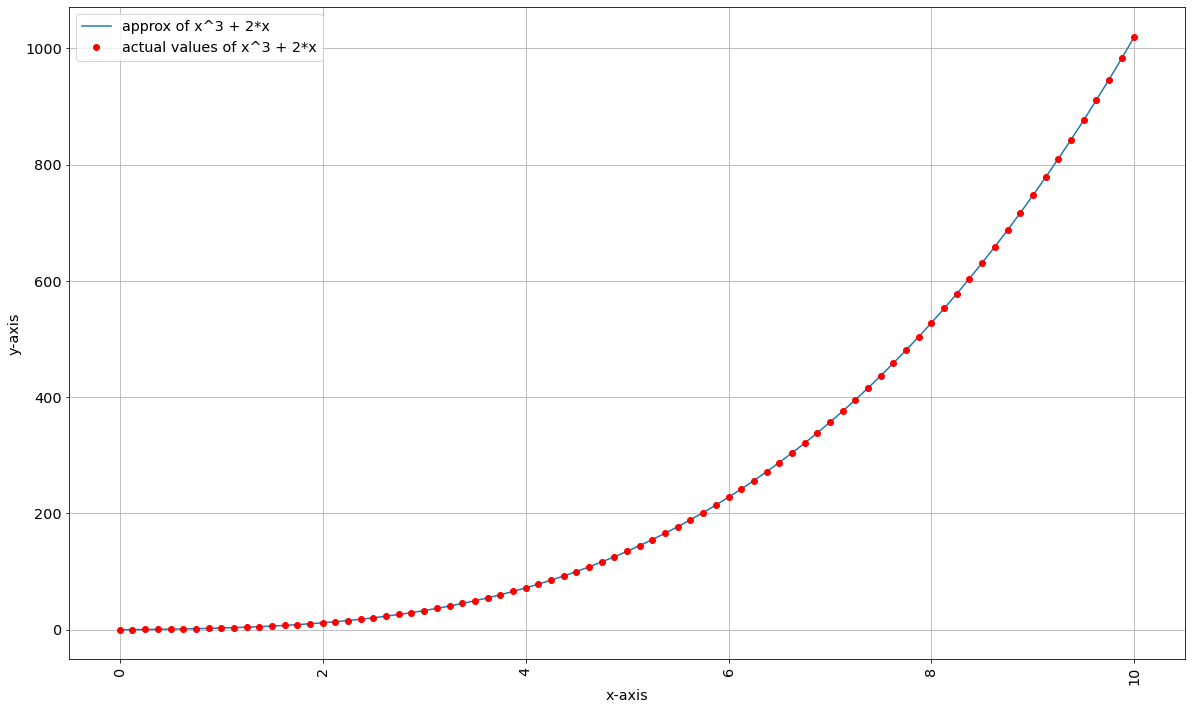

degree of approx: 5


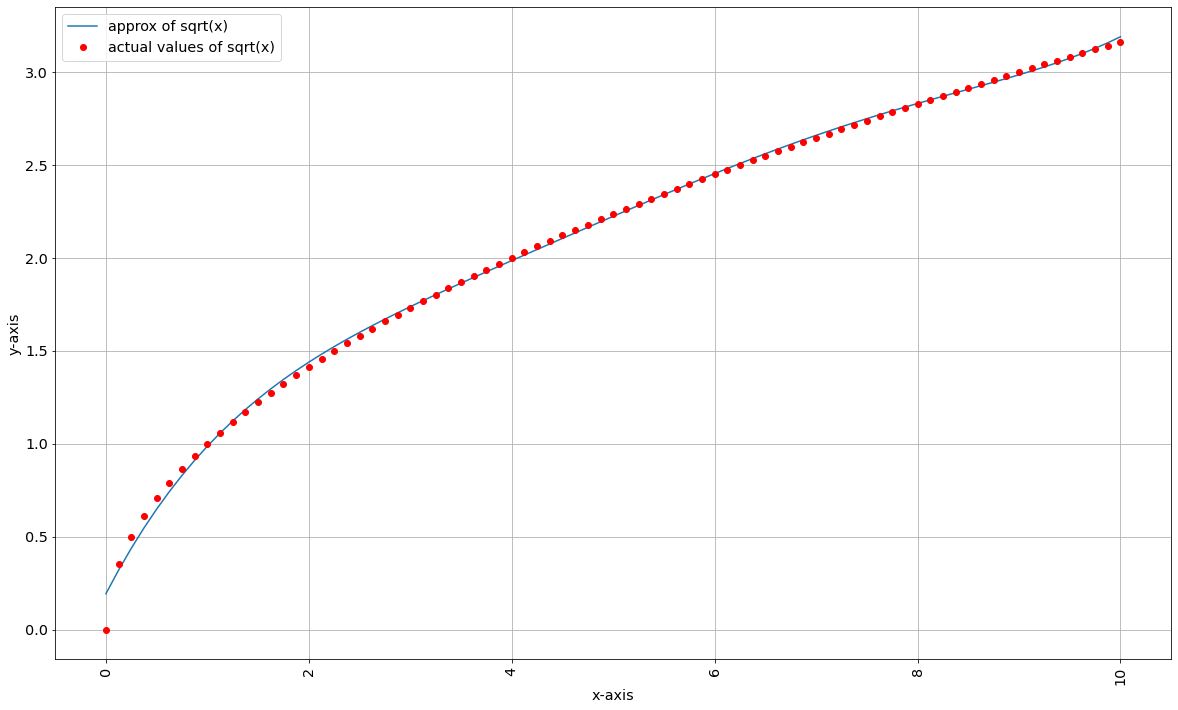

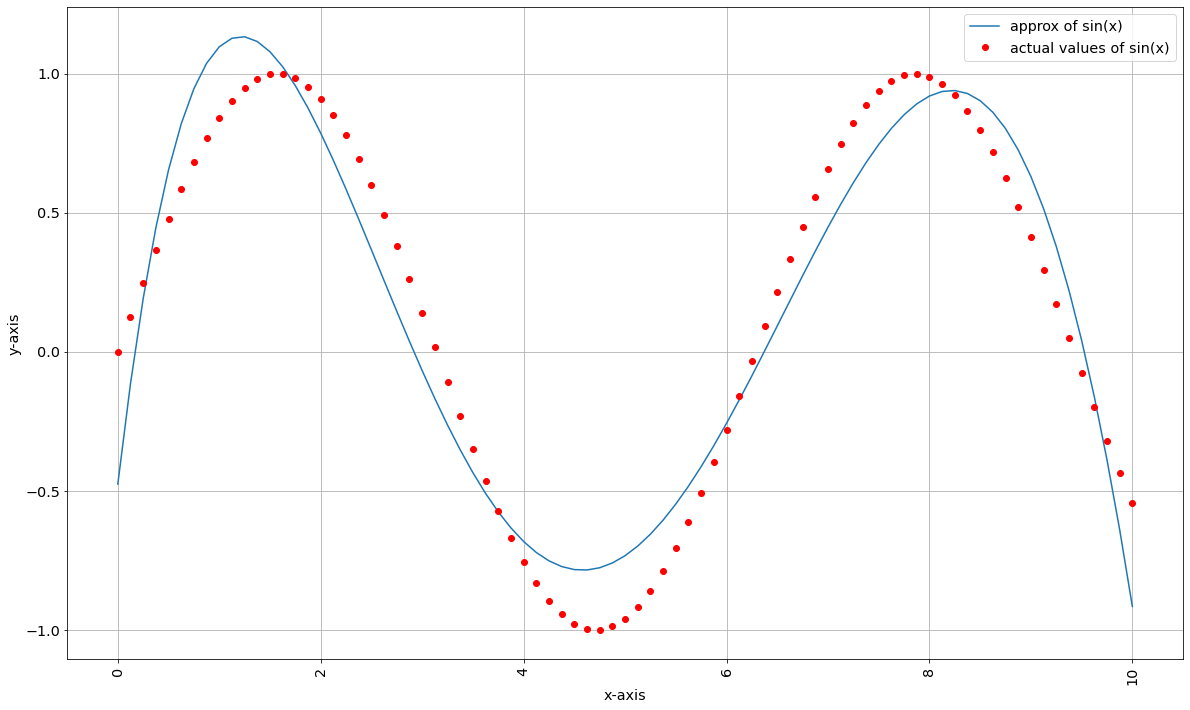

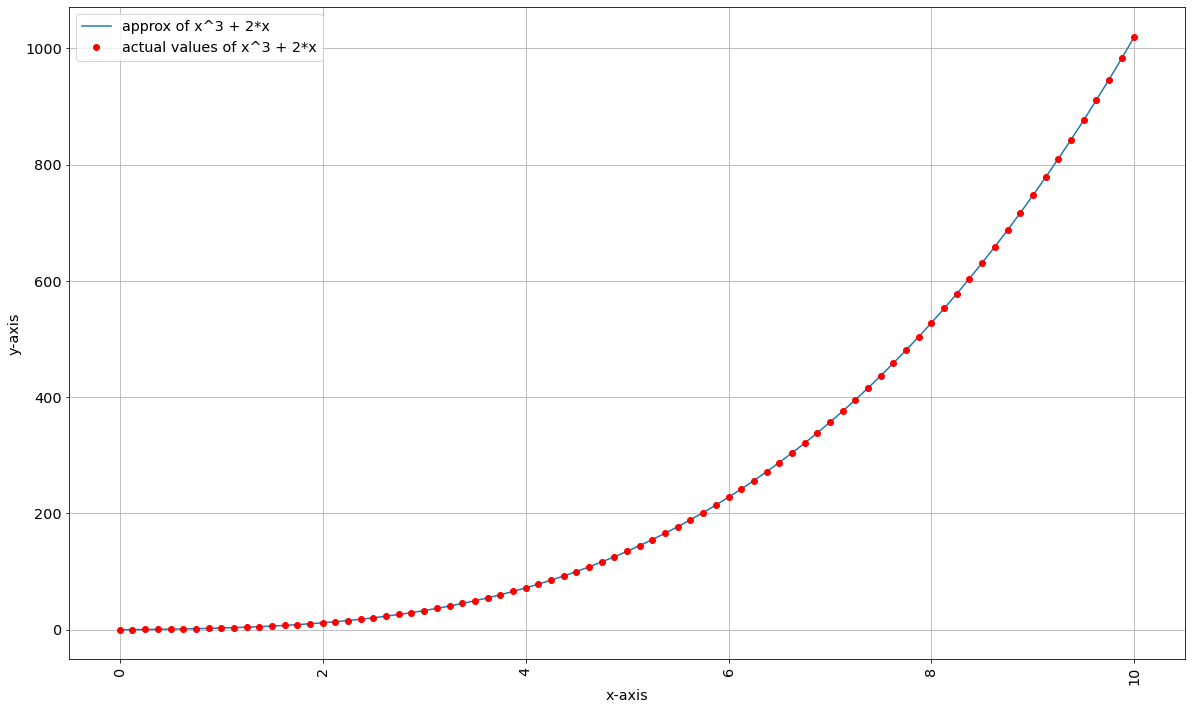

degree of approx: 6


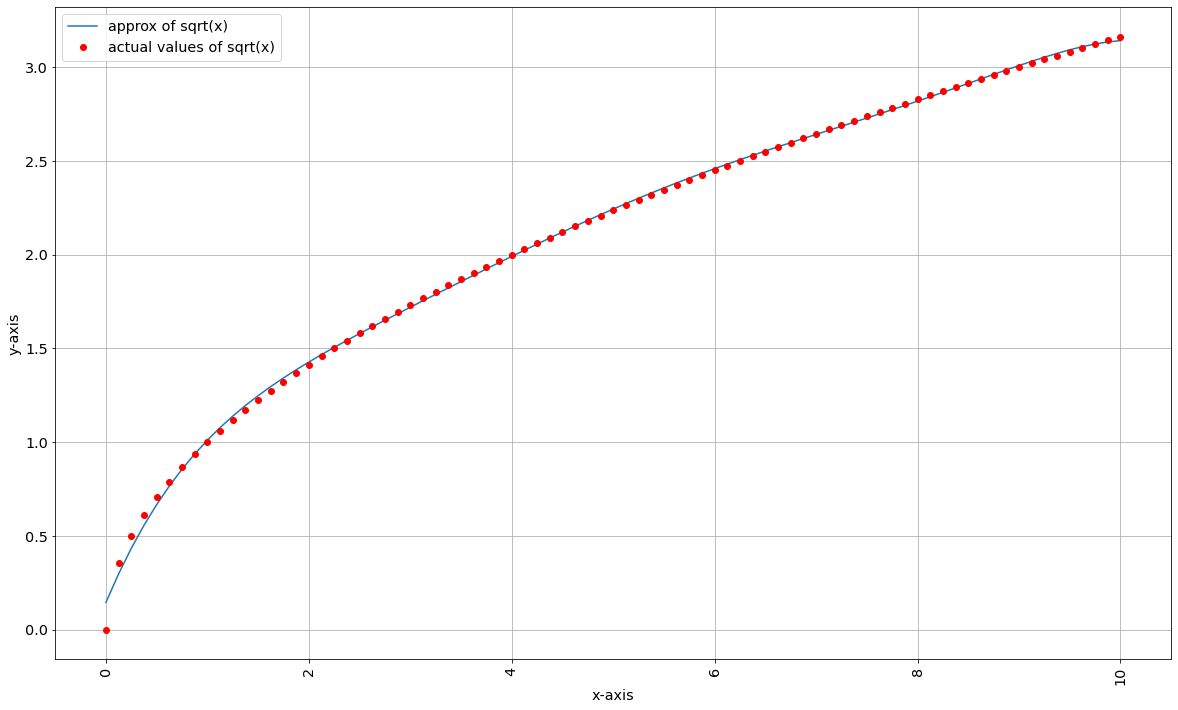

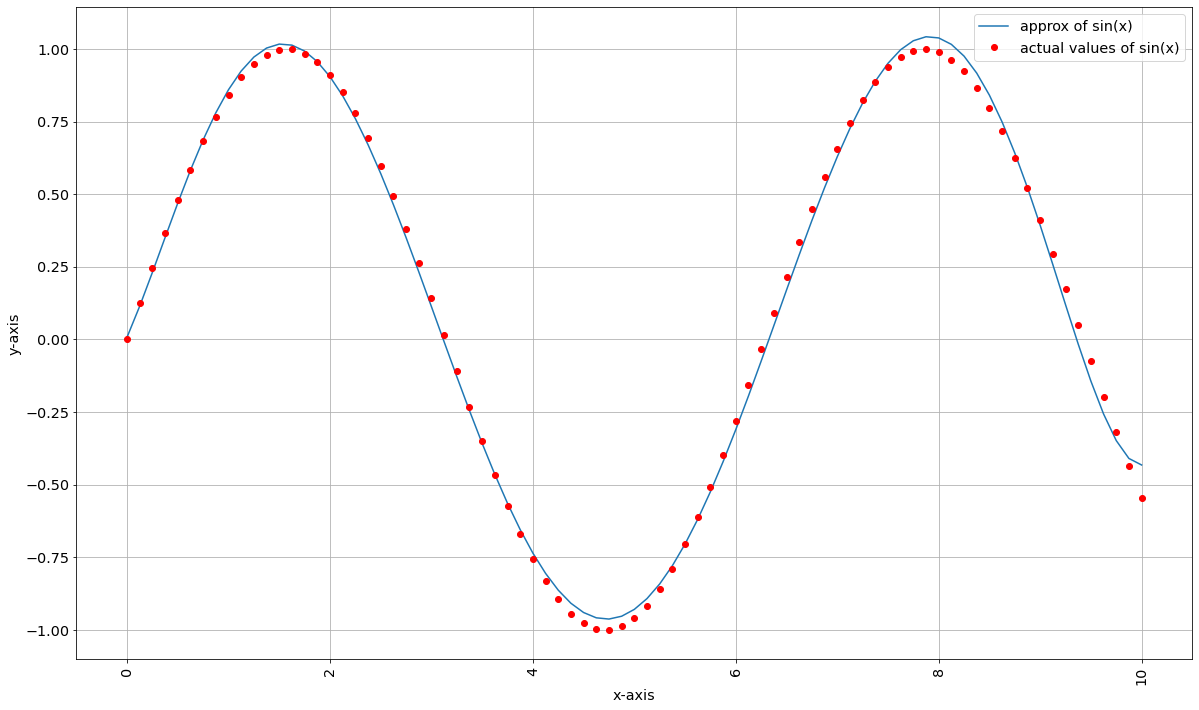

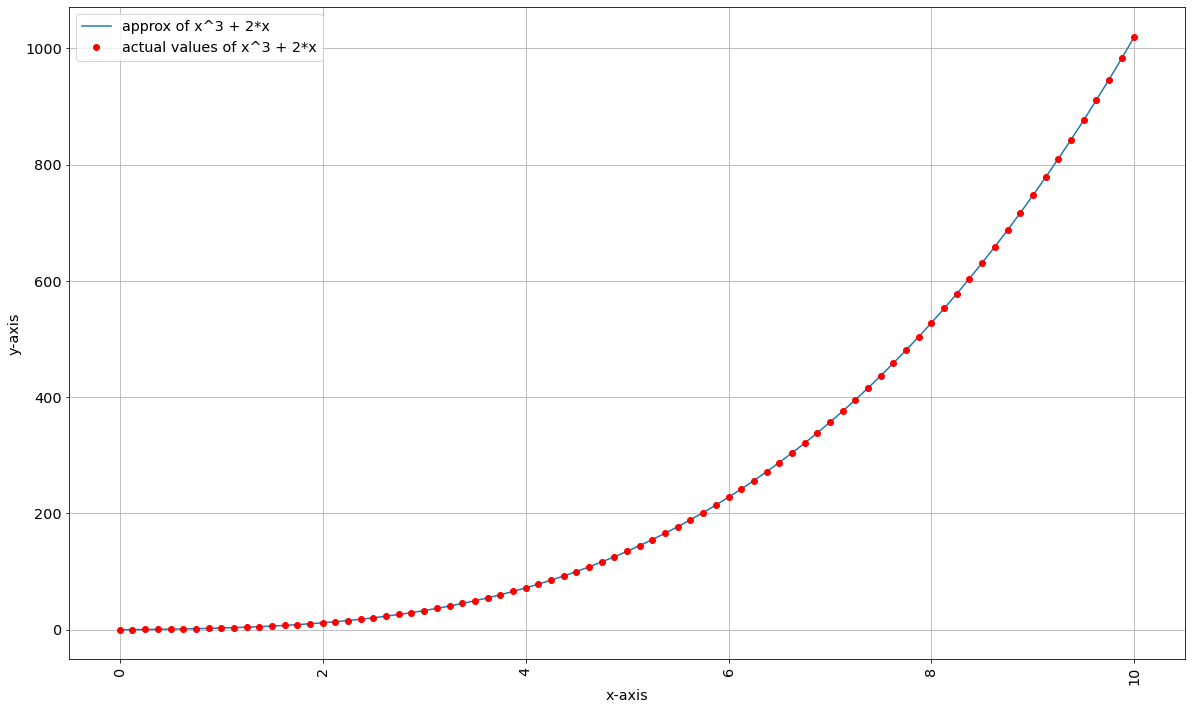

degree of approx: 7


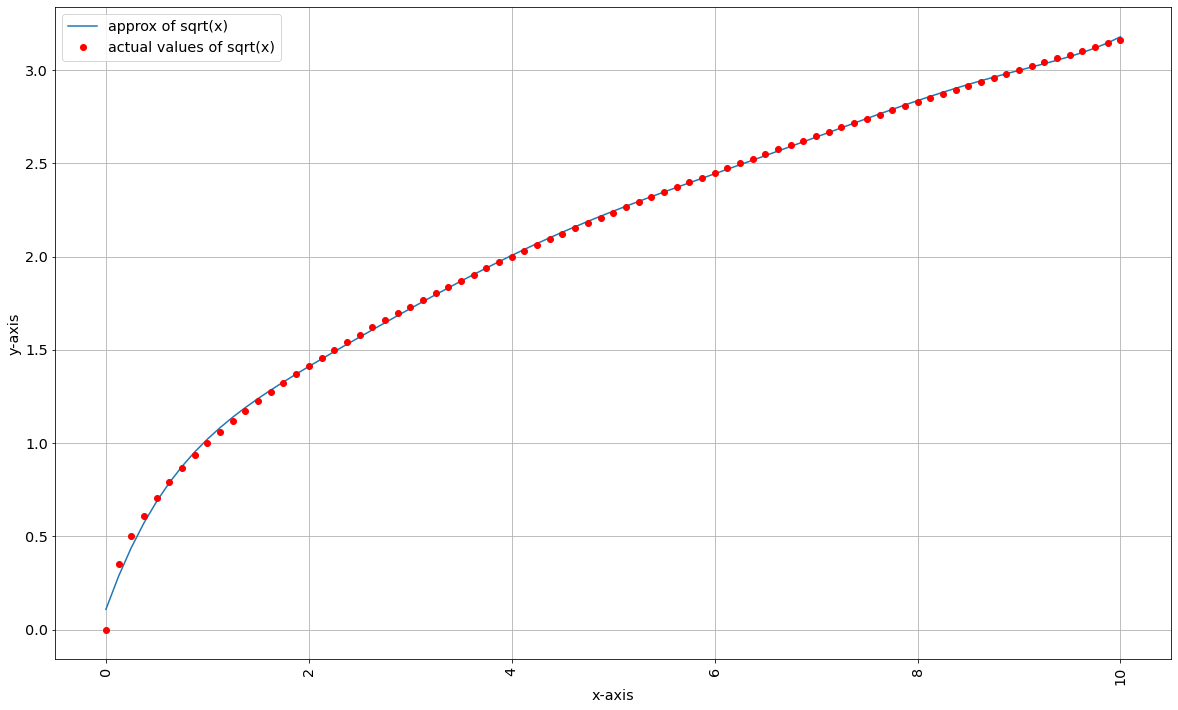

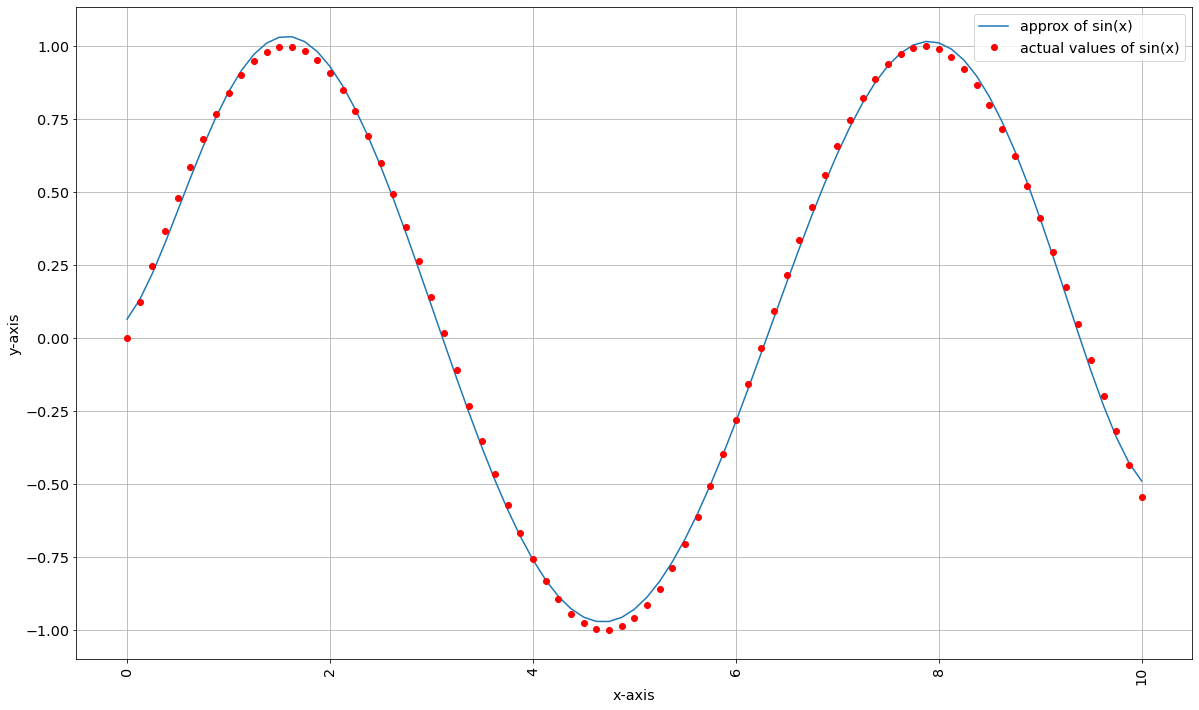

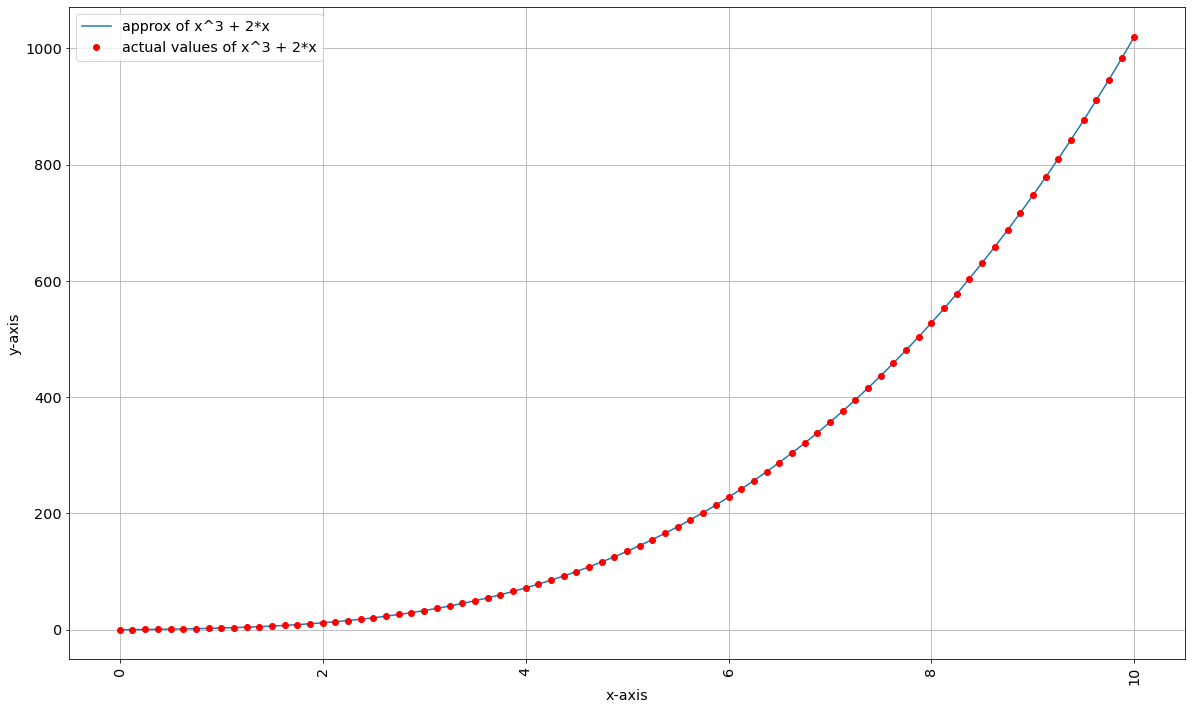

degree of approx: 8


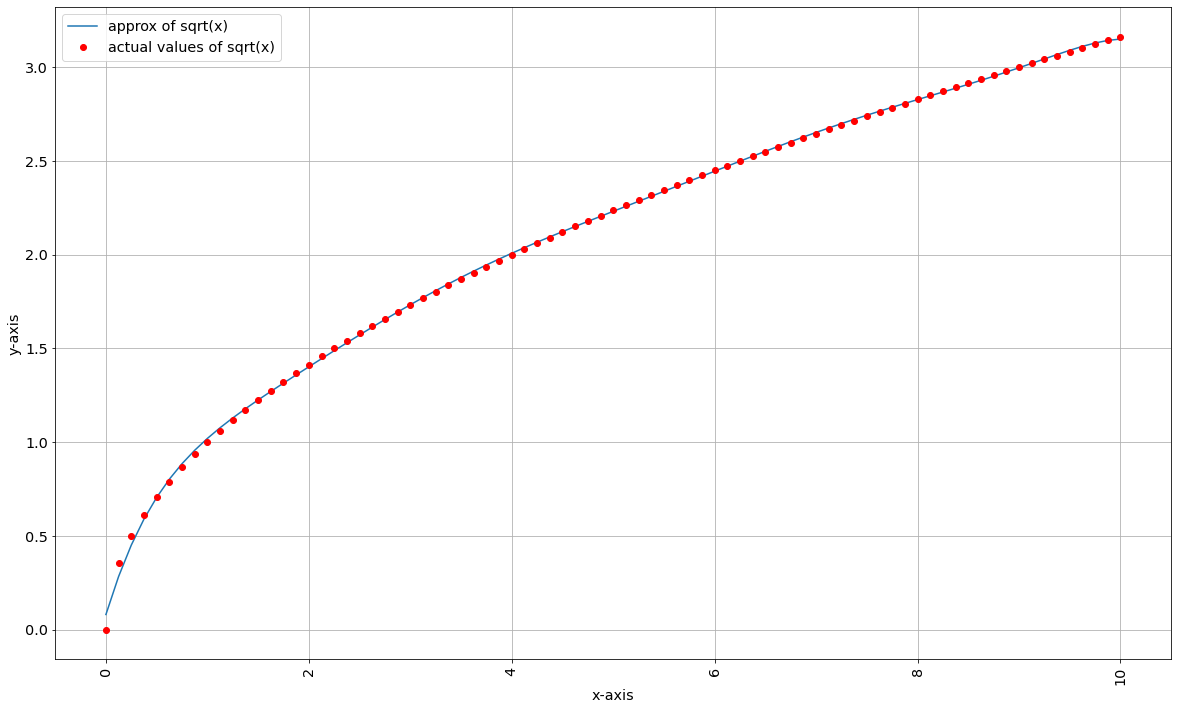

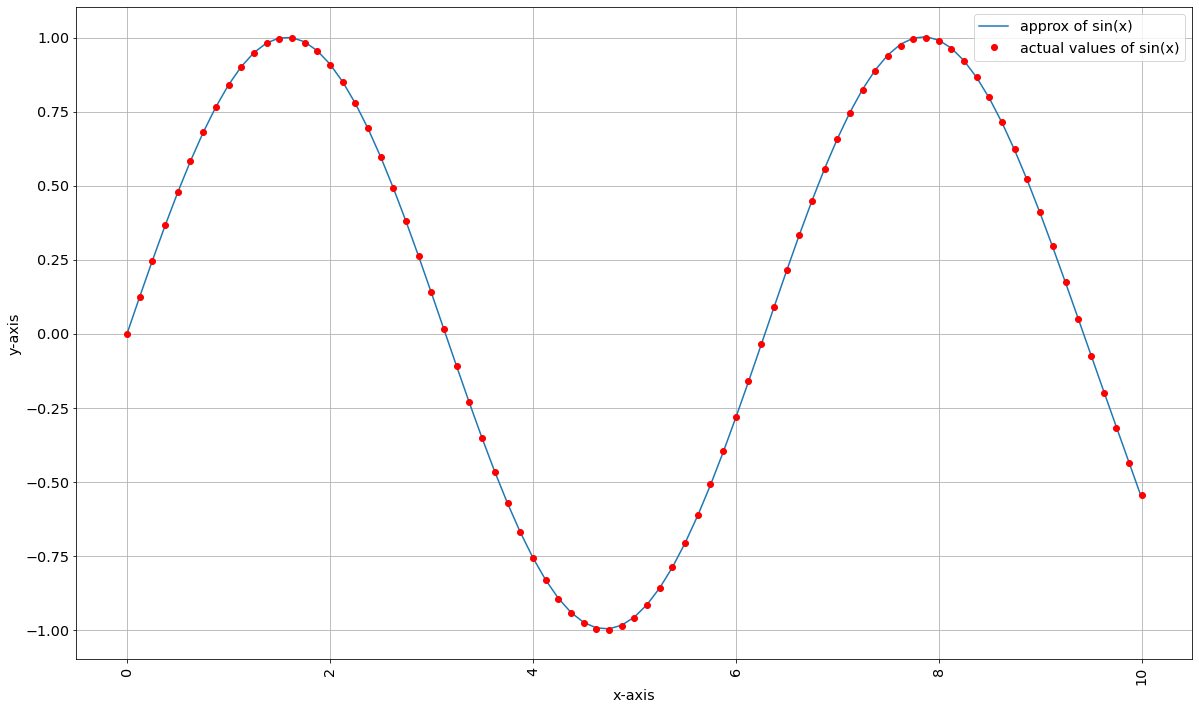

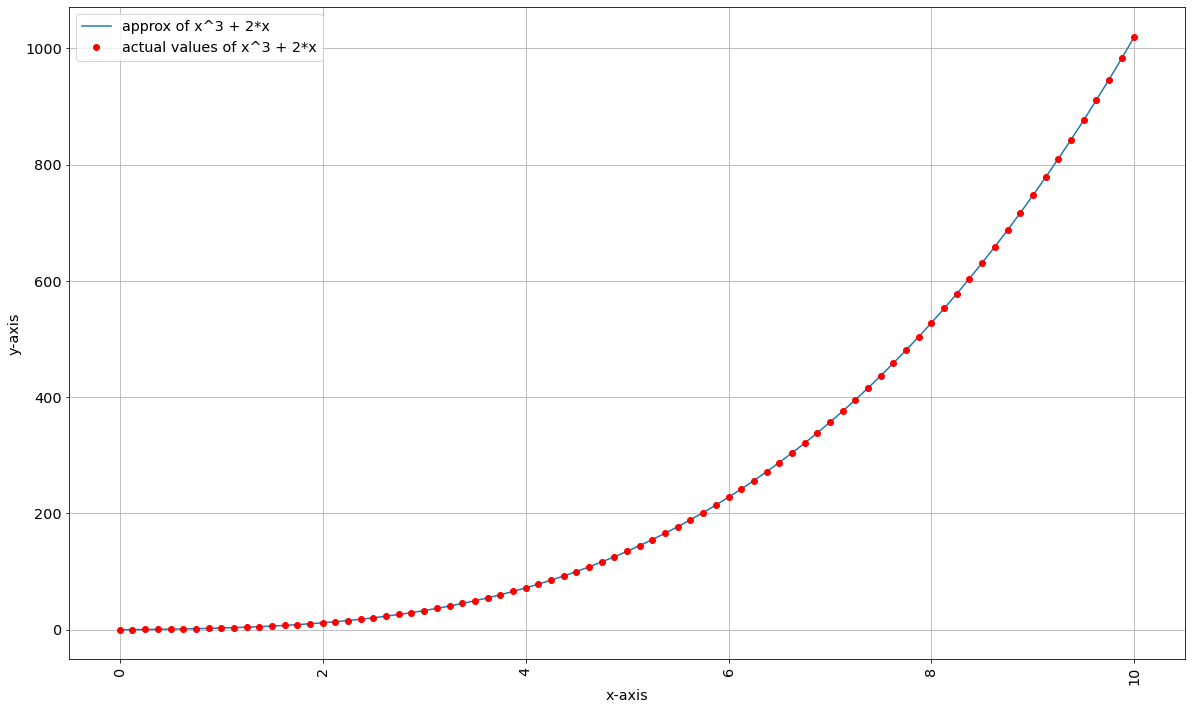

degree of approx: 9


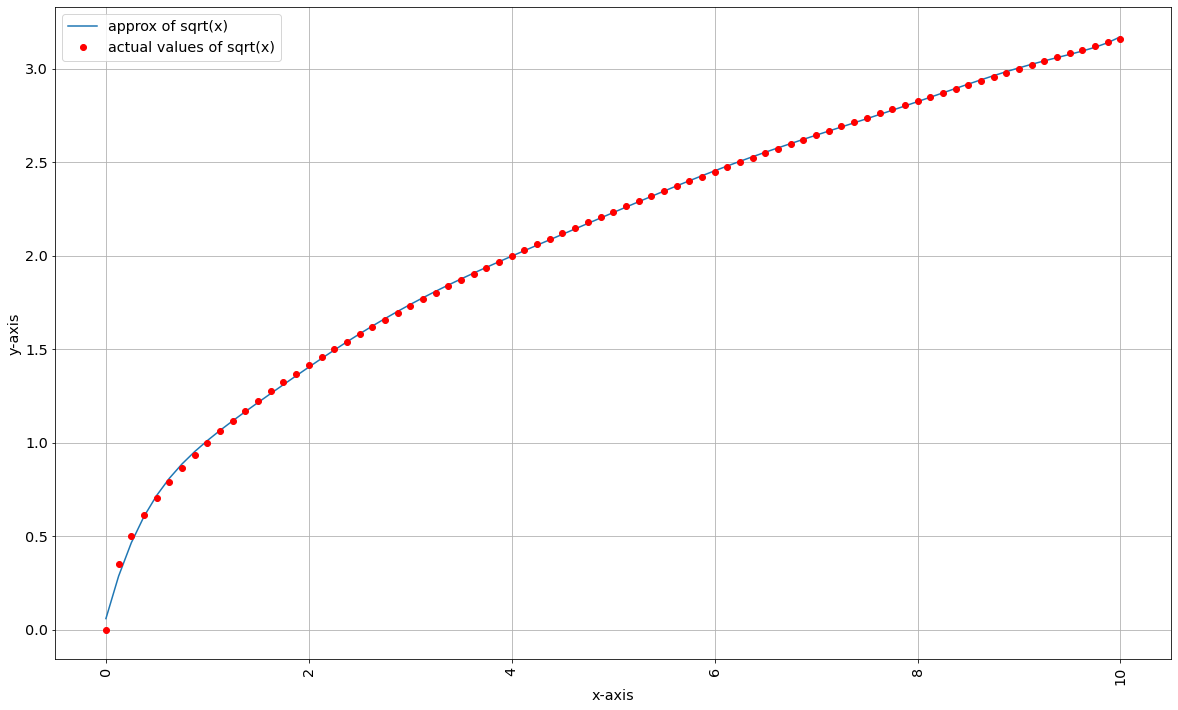

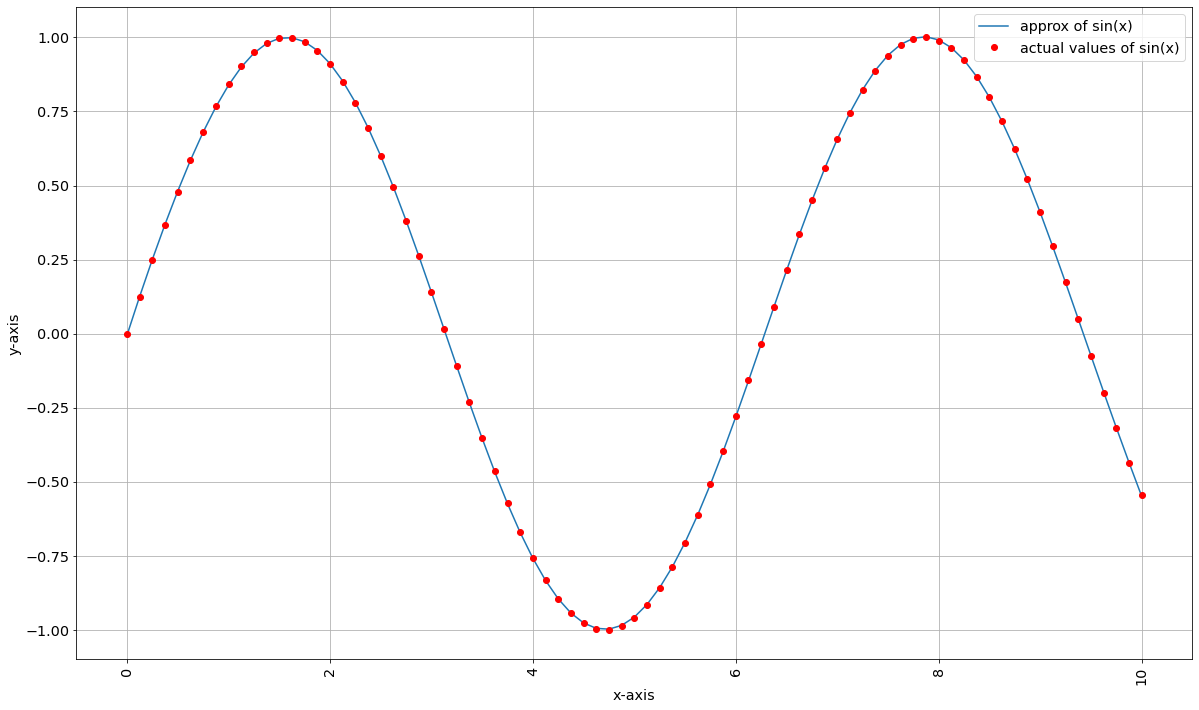

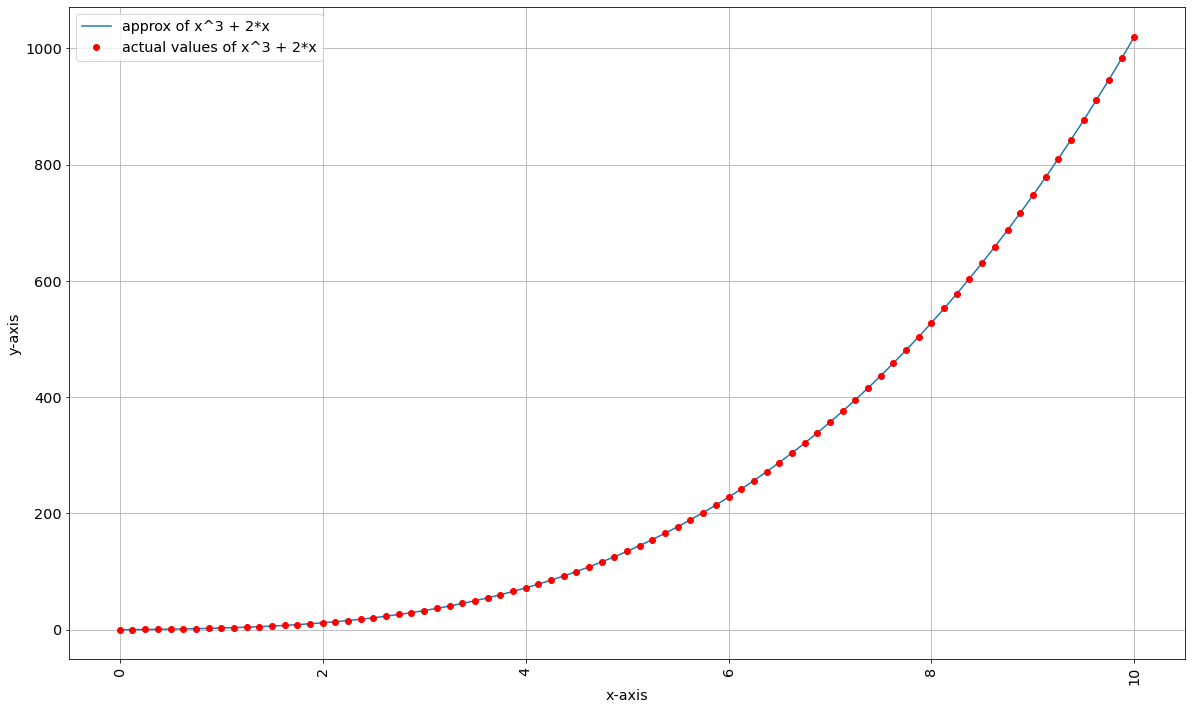

degree of approx: 10


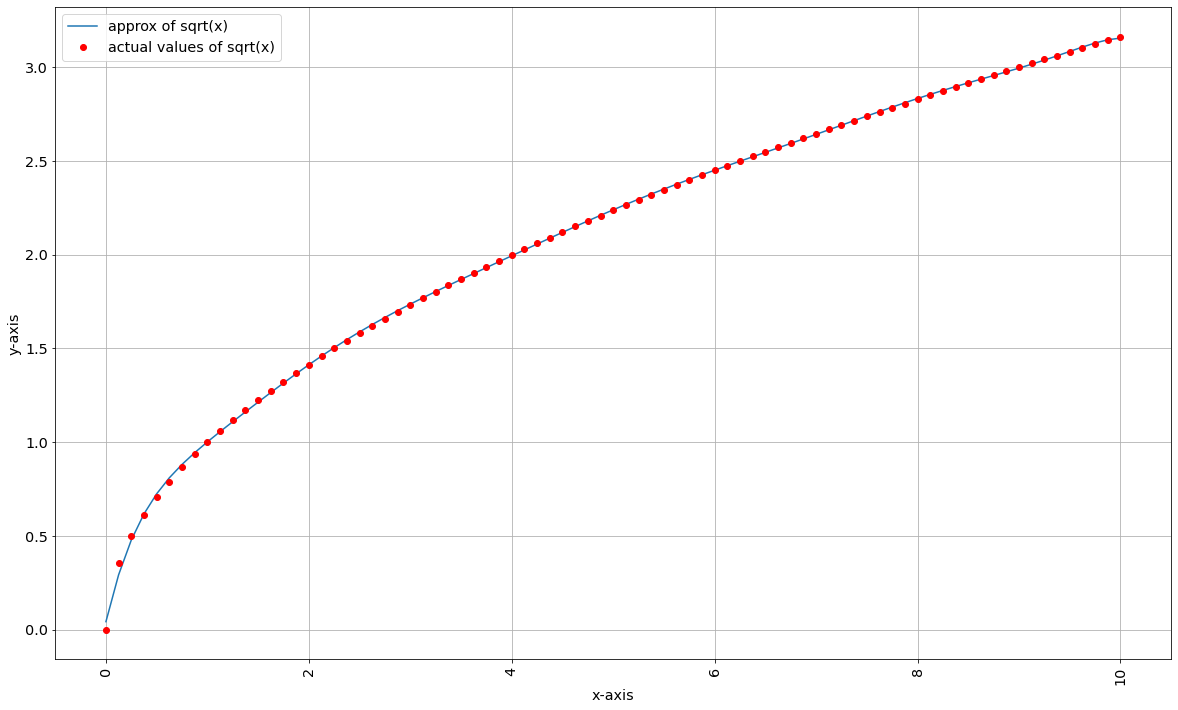

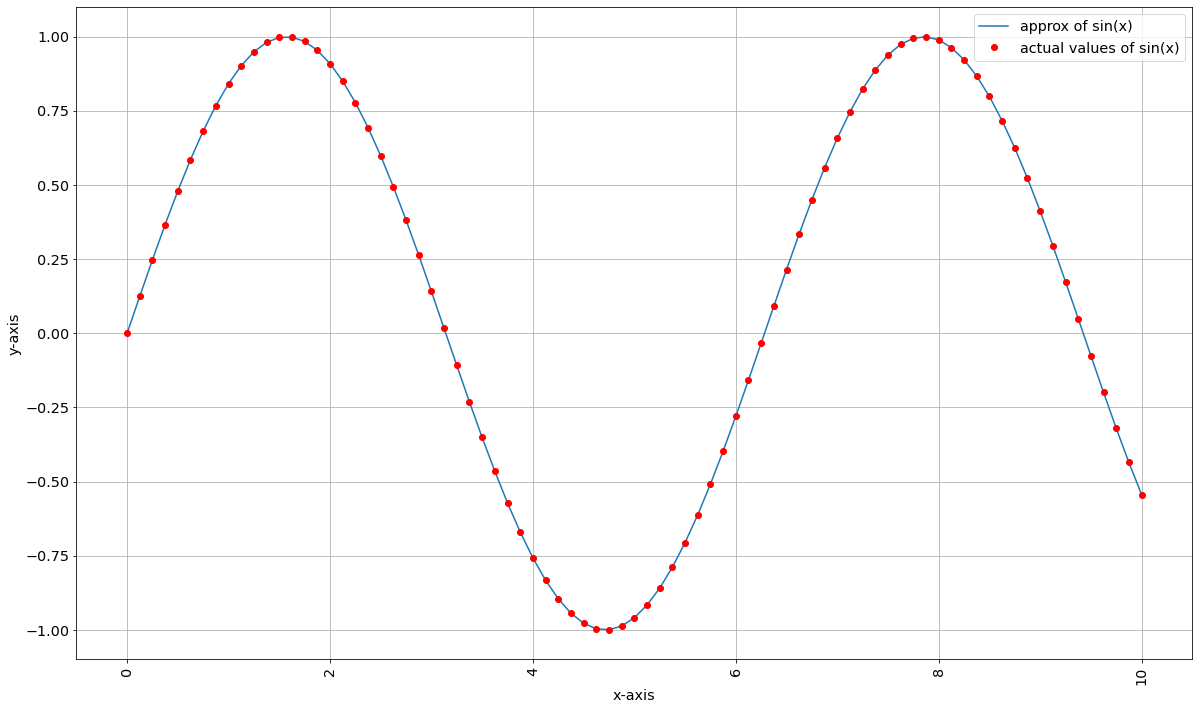

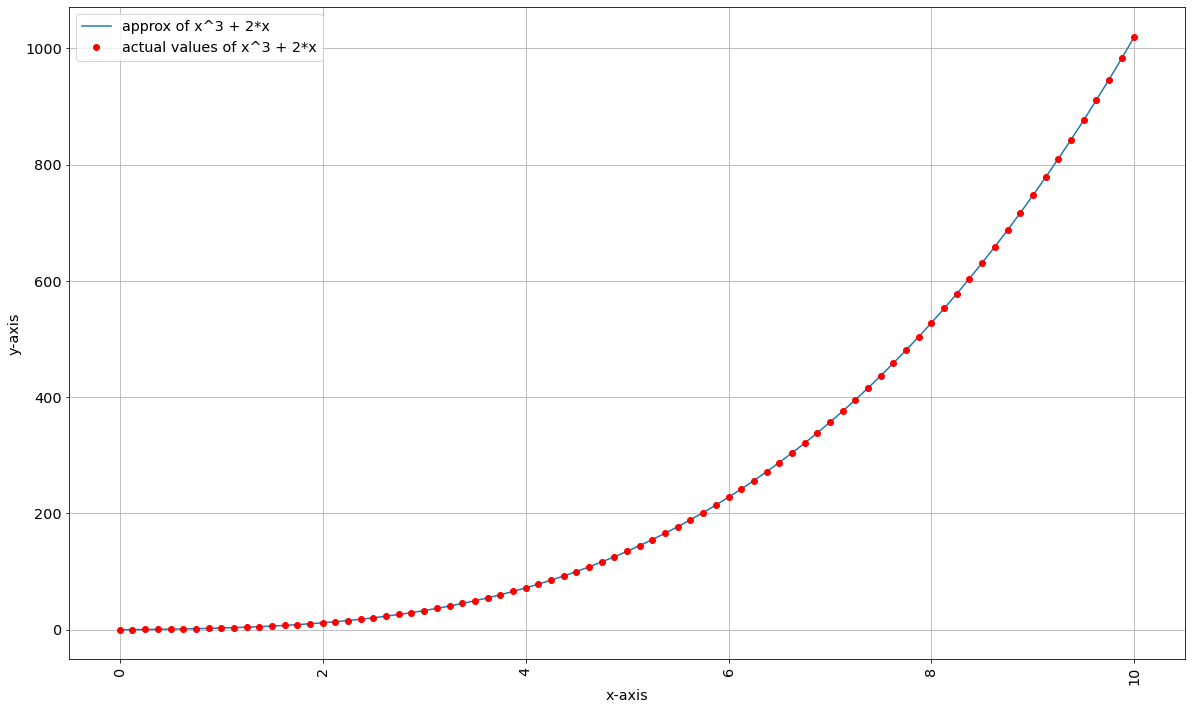

In [25]:
python_approx(0, 10, 80, 10)

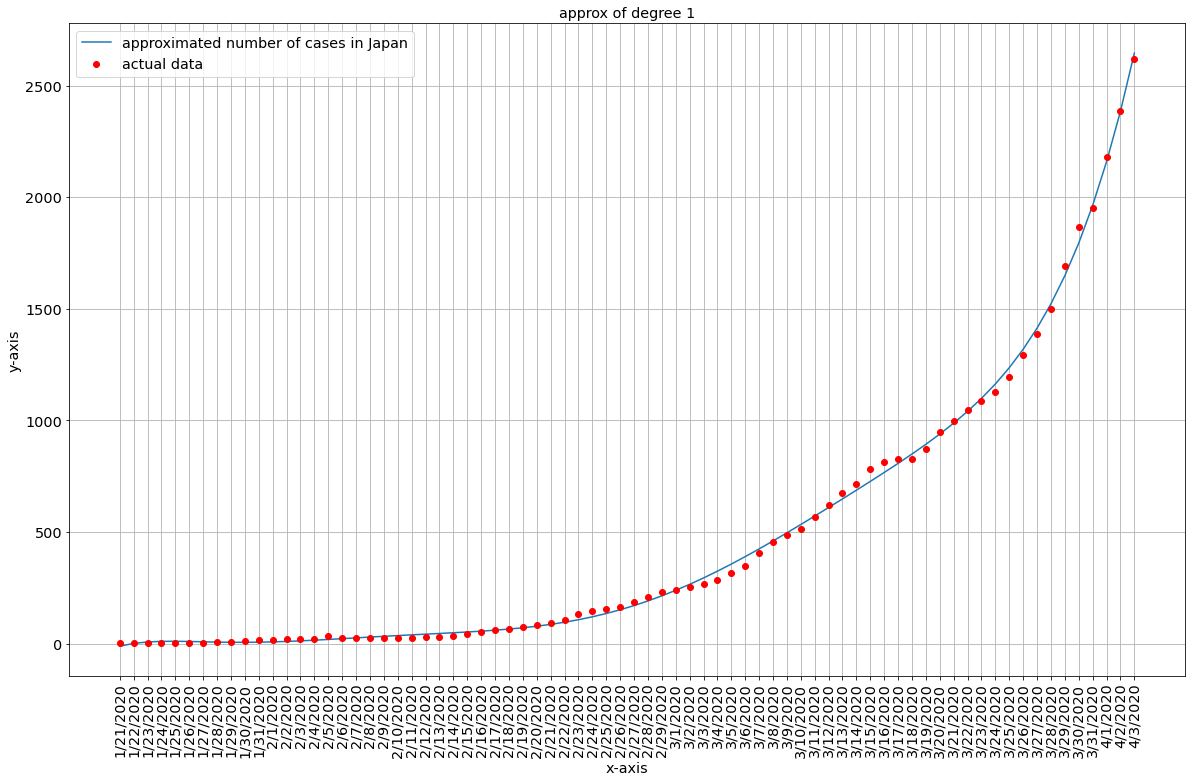

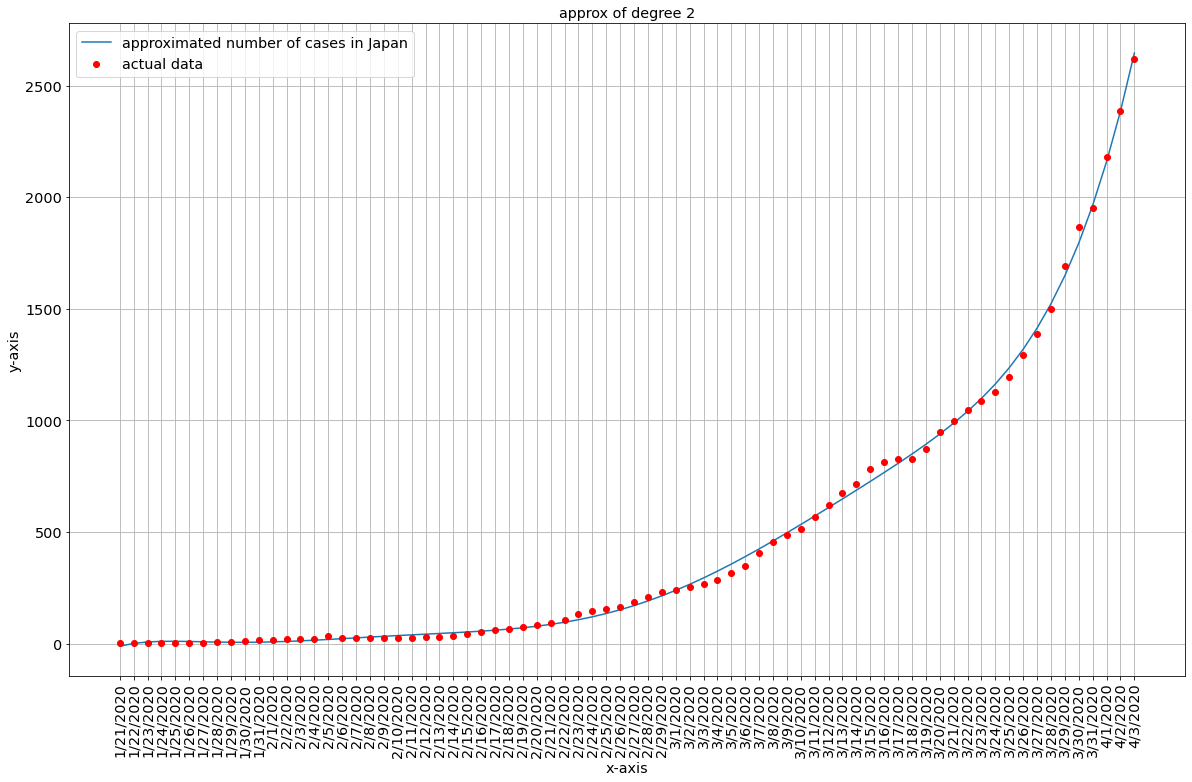

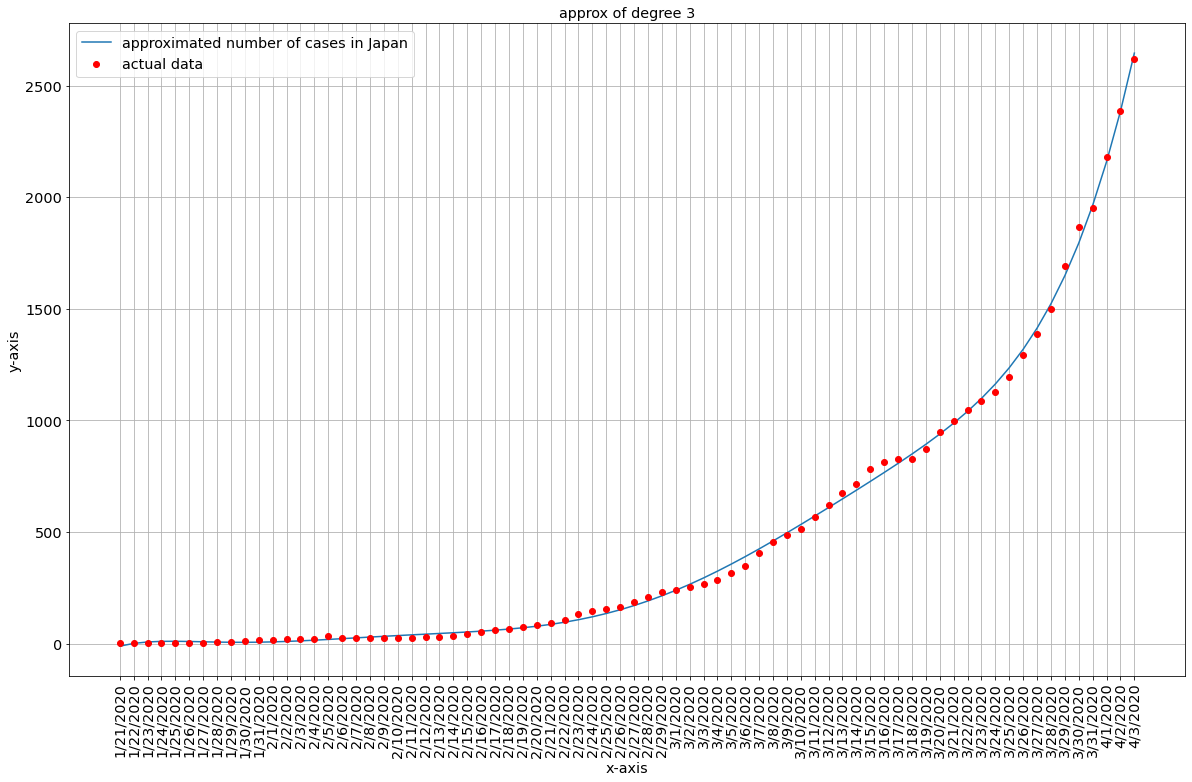

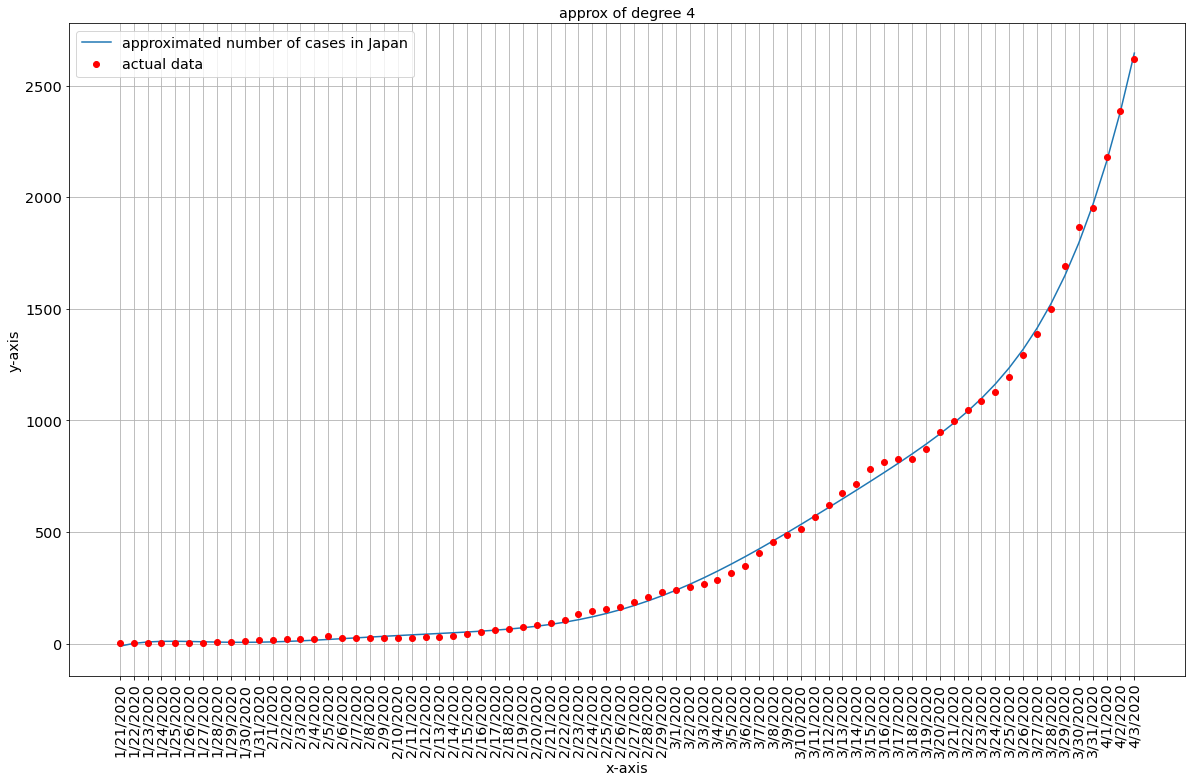

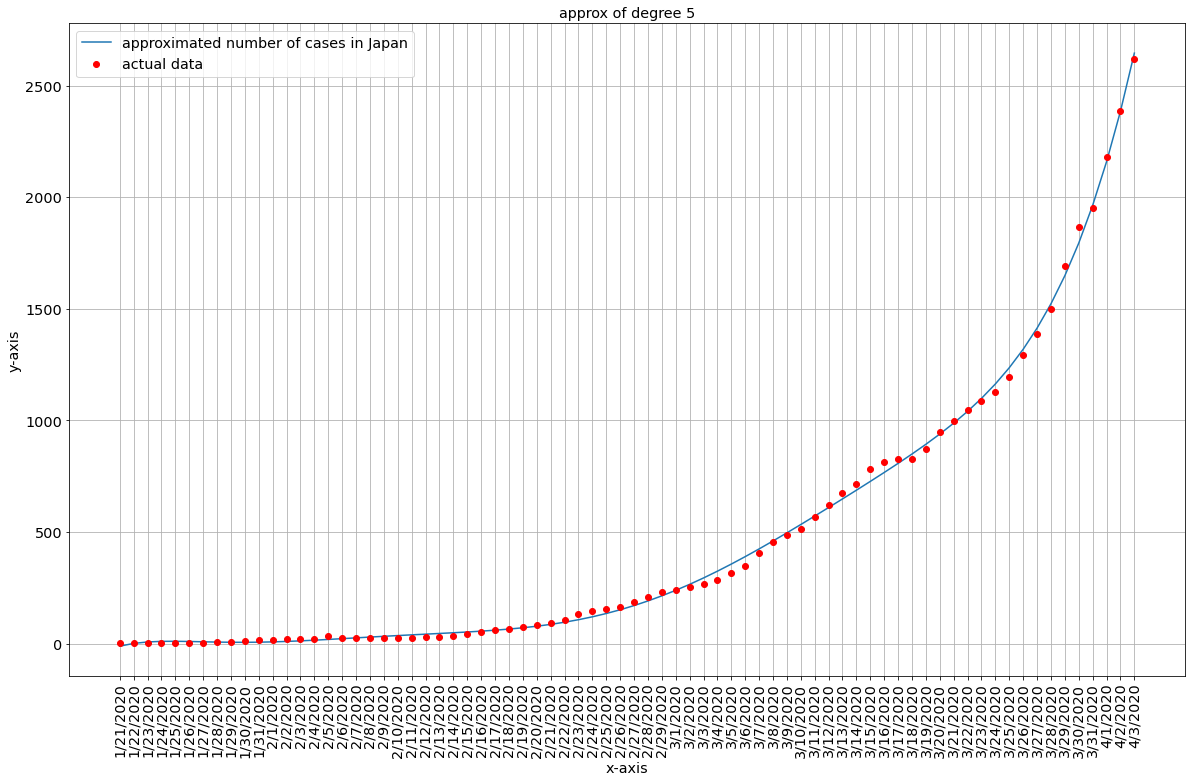

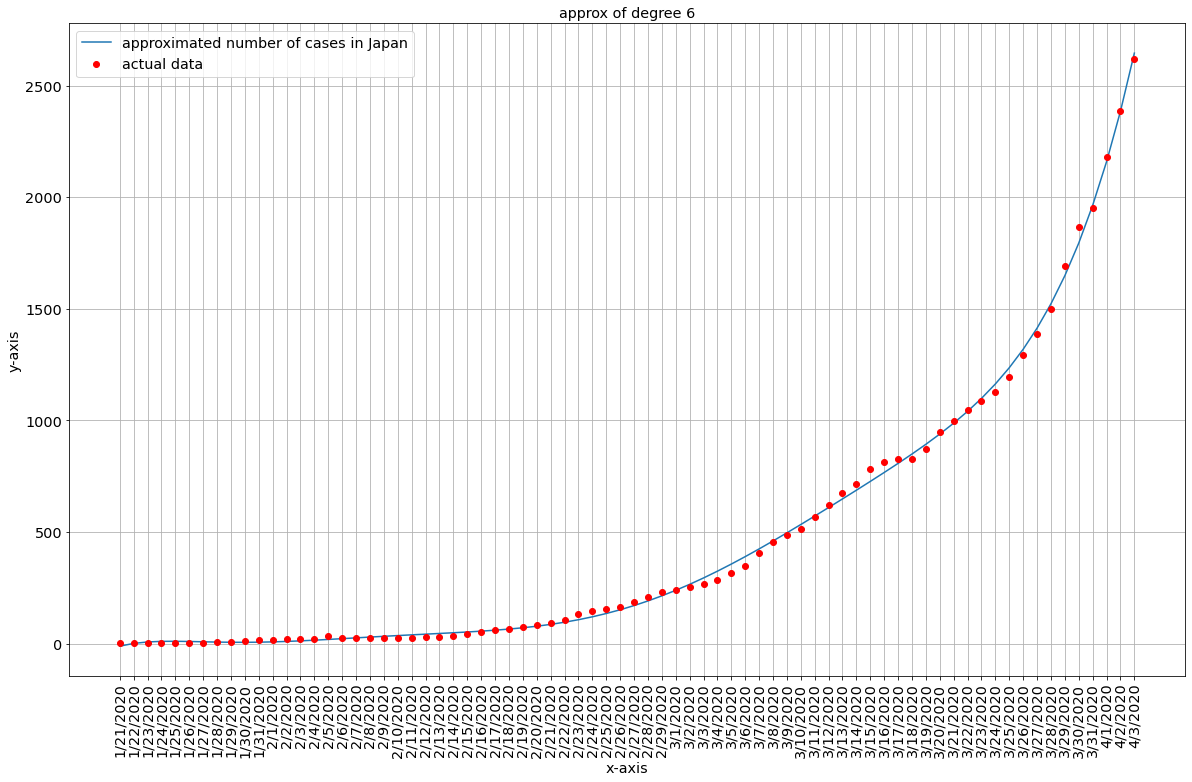

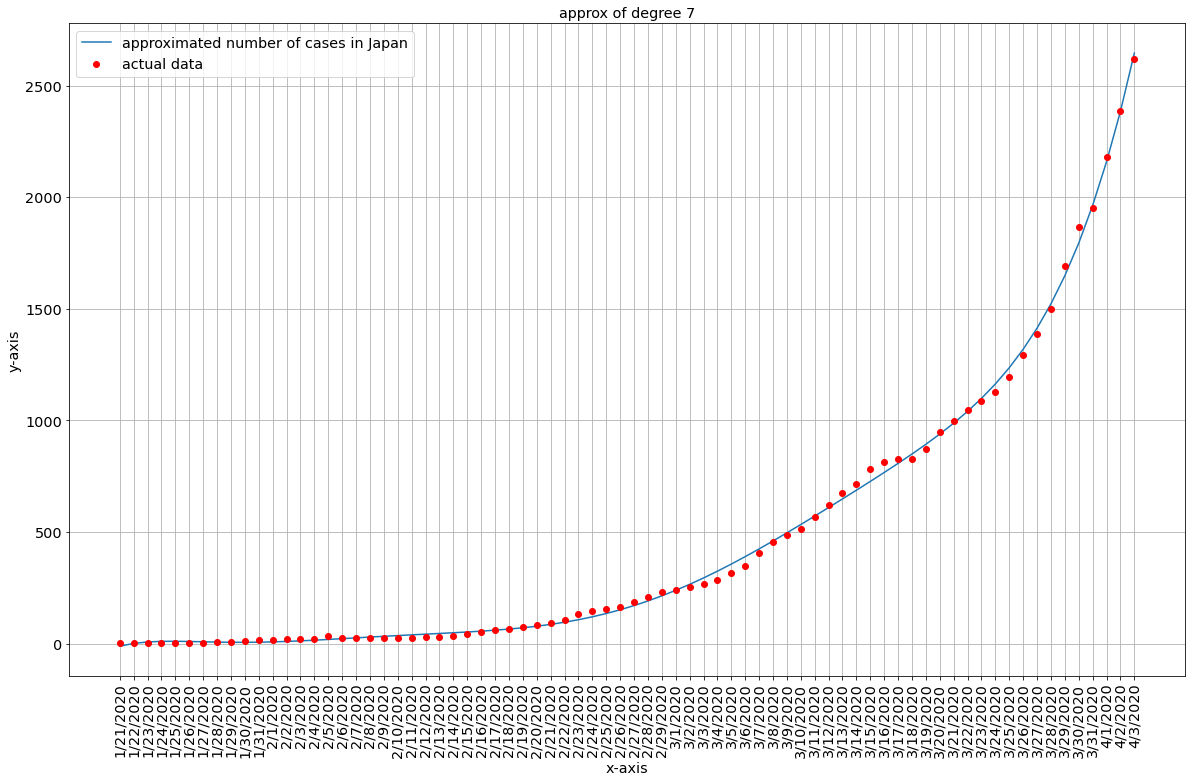

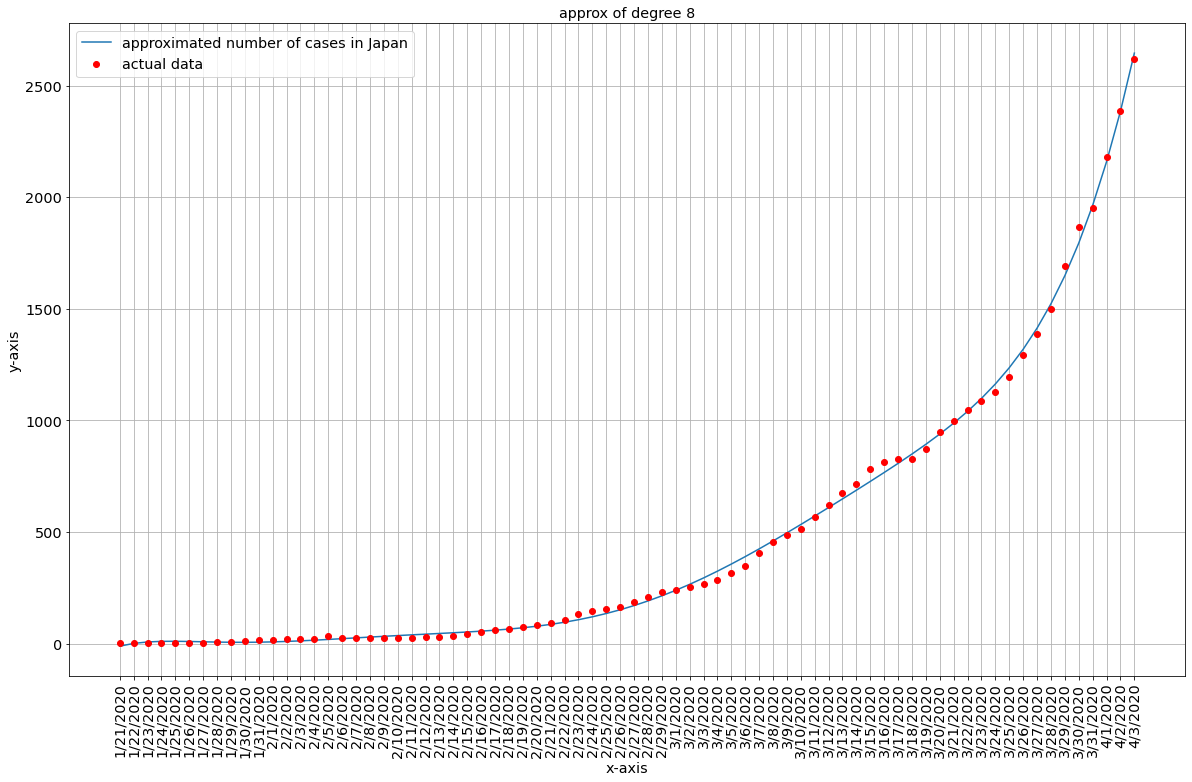

In [26]:
def coronavirus_approx_python(dates, cases, degree):
    for i in range(1, degree + 1):
        cases_polynomial = np.polyfit(np.linspace(1, len(dates), len(dates)), cases, degree)
        cases_values = np.polyval(cases_polynomial, np.linspace(1, len(dates), len(dates)))

        params = {'legend.fontsize': 'x-large',
                  'figure.figsize': (20, 12),
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
        plt.rcParams.update(params)
        plt.title(f'approx of degree {i}')
        plt.plot(dates, cases_values, label="approximated number of cases in Japan")
        plt.plot(dates, cases, 'ro', label="actual data")
        plt.grid(True, which='both')
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

coronavirus_approx_python(dates, cases, 8)